# An Exploratory Data Analysis on Val's Habits

## 👋 Introduction
James Clear, writer of the critically-acclaimed Atomic Habits, declares that habits are the compound interest of self-improvement. During the second semester of my sophomore year (January 2024 - May 2024), I was able to set-up systems that manually and automatically recorded my habits. Understanding my habits can allow me to better fine-tune my systems to improve the skills and relationships I value. Right now, I have a lot of data but I haven't utilized any of it yet. Thus, this exploratory data analysis (EDA) comes into light.
## 💡Project Description
This EDA focuses on Val's habits during his second semester of sophomore year. The goal is to extract data-driven insights that will be useful for his first semester of junior year. What observations can be made and how can this help? Specifically, the following data are used:
- `habits`: Sourced from a Google Form Val made that records daily habits such as number of toothbrushes in a day, minutes meditated, and overall mood.
- `exercise`: Sourced from Val's Strava account using the app's API. Strava is an app that lets users record their exercise data.
- `steps`: Val's step data, sourced from the Samsung Health app.
- `sleep`:  Val's sleep data, sourced from the Samsung Health app.
- `events`: A table containing significant academic or extracurricular events Val participated in.

## 📚 Step 0: Imports and Reading Data

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Other stuff
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler

In [2]:
# Styling and preferences
sns.set(style="dark", palette="muted")

In [3]:
# For manually created CSV data
habits = pd.read_csv('data/habits-edited.csv')
events = pd.read_csv('data/events.csv')

In [4]:
# For automated CSV data
steps = pd.read_csv('data/steps-converted.csv')
sleep = pd.read_csv('data/sleep-converted.csv')
exercise = pd.read_csv('data/exercise.csv')
devices = pd.read_csv('data/devices.csv')

- I edited the habits CSV file because there were date inconsistencies (thus the filename `habits-edited.csv`). I did not put a date field on the habit form when I made it so I only relied on the timestamp. But there were some days I answered the form more than once to "catch up" on days I was not able to answer. There were also a few days that were blank. I manually went through all dates to fix the timestamp. Luckily there were only around 126 rows. This is already a helpful insight for next semester's habit form: Add a date field.
- Downloading my health data was done through the Samsung Health app. The data provided consists of JSON files and a lot of CSV files. I decided to use the `com.samsung.shealth.tracker.pedometer_day_summary.[date of download].csv` for steps and `com.samsung.shealth.sleep.[date of download].csv` for sleep.
- Also, using `pd.read_csv` on these files produced a `ParserError` so I first imported them to Google Sheets and removed the first row. After downloading them again as CSV files, they're now converted to Pandas dataframes.
- Downloading my Strava exercise data was done through https://entorb.net/strava/. The app allowed me to skip the trouble of having to access Strava's API myself.
- Note to self: Possibly include screen time/usage data from mobile phone and tablet (when I gain the energy to do so). Current methods prove to be difficult.

## 🤔 Step 1: Data Understanding

In [5]:
habits.iloc[0]

Timestamp                                                                                   1/15
Toothbrush                                                                                   2.0
Skincare                                                                                Complete
Daily mental well-being                                                                      3.0
Read                                                                                         Yes
Touch typing                                                                                  No
Exercise                                                                             Daily steps
Minutes meditated                                                                            5.0
What were you grateful for today?                                                         malena
Any notable wins today?                                                                      NaN
Any message for future Val?   

The bottom half of the columns are weekly open-ended questions I ended up not following because I found the questions long and tiresome to do. So, I'll focus on columns I consistenly answered.

In [6]:
habits['Timestamp']

0      1/15
1      1/16
2      1/17
3      1/18
4      1/19
       ... 
122    5/16
123    5/17
124    5/18
125    5/19
126    5/20
Name: Timestamp, Length: 127, dtype: object

I'll need to convert the timestamp column into a proper datatype. But at least I already know that I'll be focusing on the data from January 15 to May 20, the official days of the semester.

In [7]:
events.head(3)

event             type        date_start date_end
0  Samsung Mission  extracurricular  January 12, 2024      NaN
1  Samsung Mission  extracurricular           1/15/24      NaN
2  Samsung Mission  extracurricular           1/18/24      NaN

In [8]:
events['type'].unique()

array(['extracurricular', 'fun', 'hackathon', 'academic', 'long holiday',
       'long test'], dtype=object)

I'll need to convert the date columns into proper format as well. Moreover, I see that I have six main types of events.

In [9]:
steps.head(3)

create_sh_ver  step_count  \
0            NaN        9985   
1            NaN         908   
2            NaN        6381   

                                        binning_data  active_time  \
0  e133e7fd-212e-4f0a-9e44-487e4373e2ea.binning_d...      4729744   
1  c2549c34-43e7-4607-a6d6-3b59e4d2186e.binning_d...       513471   
2  a642decc-d8b4-4799-b5cc-4d7e5b0351d8.binning_d...      3488910   

   recommendation  modify_sh_ver  run_step_count          update_time  \
0            6000            NaN             475  2023-12-18 17:12:05   
1            6000            NaN               5   2023-12-18 4:53:19   
2            6000            NaN             125   2023-12-18 4:53:19   

           source_package_name         create_time  ...     speed   distance  \
0  com.sec.android.app.shealth  2023-12-18 4:53:19  ...  1.674499  7919.9517   
1  com.sec.android.app.shealth  2023-12-18 4:53:19  ...  1.326753   681.2500   
2  com.sec.android.app.shealth  2023-12-18 4:53:19  ...  1.380428  4816.1904   

     calorie  walk_step_count  deviceuuid                     pkg_name  \
0  324.43960             9510  VfS0qUERdZ  com.sec.android.app.shealth   
1   32.42000              903  VfS0qUERdZ  com.sec.android.app.shealth   
2  205.31001             6256  VfS0qUERdZ  com.sec.android.app.shealth   

  healthy_step                                        achievement  \
0            0  e133e7fd-212e-4f0a-9e44-487e4373e2ea.achieveme...   
1            0  c2549c34-43e7-4607-a6d6-3b59e4d2186e.achieveme...   
2            0  a642decc-d8b4-4799-b5cc-4d7e5b0351d8.achieveme...   

                               datauuid       day_time  
0  e133e7fd-212e-4f0a-9e44-487e4373e2ea  1702857600000  
1  c2549c34-43e7-4607-a6d6-3b59e4d2186e  1702684800000  
2  a642decc-d8b4-4799-b5cc-4d7e5b0351d8  1702771200000  

[3 rows x 21 columns]

In [10]:
steps.shape

(1390, 21)

In [11]:
steps.columns

Index(['create_sh_ver', 'step_count', 'binning_data', 'active_time',
       'recommendation', 'modify_sh_ver', 'run_step_count', 'update_time',
       'source_package_name', 'create_time', 'source_info', 'speed',
       'distance', 'calorie', 'walk_step_count', 'deviceuuid', 'pkg_name',
       'healthy_step', 'achievement', 'datauuid', 'day_time'],
      dtype='object')

First, there are a lot of columns for this dataset so I'll have to create a subset from it. There are also too many rows. The `deviceuuid` column describes what device was used to record the data. This implies that there are recorded entries with the same date but differing device IDs.

In [12]:
sleep.head(3)

original_efficiency  mental_recovery  factor_01  factor_02  factor_03  \
0                  NaN             78.0       32.0       55.0        5.0   
1                  NaN             41.0       11.0       47.0        4.0   
2                  NaN             61.0        8.0       32.0        0.0   

   factor_04  factor_05  factor_06  factor_07  factor_08  ...  \
0        2.0       27.0      245.0      133.0        0.0  ...   
1       19.0       32.0      475.0       79.0        4.0  ...   
2       19.0       38.0      317.0       42.0        2.0  ...   

   com.samsung.health.sleep.custom  com.samsung.health.sleep.modify_sh_ver  \
0                              NaN                                     NaN   
1                              NaN                                     NaN   
2                              NaN                                     NaN   

   com.samsung.health.sleep.update_time  com.samsung.health.sleep.create_time  \
0                    2023-12-18 4:53:19                   2023-12-16 21:51:31   
1                    2023-12-18 4:53:19                   2023-12-17 23:11:09   
2                   2023-12-18 23:04:39                   2023-12-18 23:04:29   

   com.samsung.health.sleep.time_offset  com.samsung.health.sleep.deviceuuid  \
0                              UTC+0800                           iGosmEieUd   
1                              UTC+0800                           iGosmEieUd   
2                              UTC+0800                           iGosmEieUd   

   com.samsung.health.sleep.comment com.samsung.health.sleep.pkg_name  \
0                               NaN       com.sec.android.app.shealth   
1                               NaN       com.sec.android.app.shealth   
2                               NaN       com.sec.android.app.shealth   

   com.samsung.health.sleep.end_time     com.samsung.health.sleep.datauuid  
0                2023-12-16 21:36:00  16f8cf4c-d949-4d40-b2cb-687457112eac  
1                2023-12-17 23:11:00  5f323226-adc6-4c95-b4a8-4beace795e8b  
2                2023-12-18 22:59:00  127d64de-2f7c-41c8-8ec6-61de5b7f58e8  

[3 rows x 48 columns]

In [13]:
sleep.shape

(277, 48)

In [14]:
sleep.columns

Index(['original_efficiency', 'mental_recovery', 'factor_01', 'factor_02',
       'factor_03', 'factor_04', 'factor_05', 'factor_06', 'factor_07',
       'factor_08', 'factor_09', 'factor_10', 'integrated_id',
       'has_sleep_data', 'bedtime_detection_delay',
       'wakeup_time_detection_delay', 'total_rem_duration', 'combined_id',
       'sleep_type', 'sleep_latency', 'data_version', 'physical_recovery',
       'original_wake_up_time', 'movement_awakening', 'is_integrated',
       'original_bed_time', 'goal_bed_time', 'quality', 'extra_data',
       'goal_wake_up_time', 'sleep_cycle', 'total_light_duration',
       'efficiency', 'sleep_score', 'sleep_duration', 'stage_analyzed_type',
       'com.samsung.health.sleep.create_sh_ver',
       'com.samsung.health.sleep.start_time',
       'com.samsung.health.sleep.custom',
       'com.samsung.health.sleep.modify_sh_ver',
       'com.samsung.health.sleep.update_time',
       'com.samsung.health.sleep.create_time',
       'com.samsung.hea

This dataset has even more columns. I'm mainly interested in the high-level values such as sleep score, sleep time, among others.

In [15]:
exercise.head(3)

id type x_gear_name     start_date_local    x_week  x_start_h  \
0  11500446337  Run         NaN  02.01.2024 17:11:00  2023-W53       17.2   
1  11500452565  Run         NaN  04.01.2024 17:16:00  2023-W53       17.3   
2  11500460588  Run         NaN  07.01.2024 18:41:00  2024-W01       18.7   

            name  x_min  x_km  x_min/km  ...           start_date  \
0  Afternoon Run   42.8  6.11      7.01  ...  02.01.2024 17:11:00   
1  Afternoon Run   18.6  3.02      6.14  ...  04.01.2024 17:16:00   
2    Evening Run   11.0  2.05      5.38  ...  07.01.2024 18:41:00   

          timezone  total_photo_count  trainer  upload_id  upload_id_str  \
0  (GMT+00:00) GMT                  0        0        NaN            NaN   
1  (GMT+00:00) GMT                  0        0        NaN            NaN   
2  (GMT+00:00) GMT                  0        0        NaN            NaN   

   utc_offset      x_date  x_elev_%  \
0           0  2024-01-02       NaN   
1           0  2024-01-04       NaN   
2           0  2024-01-07       NaN   

                                           x_url  
0  https://www.strava.com/activities/11500446337  
1  https://www.strava.com/activities/11500452565  
2  https://www.strava.com/activities/11500460588  

[3 rows x 72 columns]

In [16]:
exercise.shape

(71, 72)

In [17]:
exercise.columns

Index(['id', 'type', 'x_gear_name', 'start_date_local', 'x_week', 'x_start_h',
       'name', 'x_min', 'x_km', 'x_min/km', 'km/h', 'x_max_km/h', 'x_mi',
       'x_min/mi', 'x_mph', 'x_max_mph', 'total_elevation_gain', 'x_elev_m/km',
       'average_heartrate', 'max_heartrate', 'average_cadence',
       'average_watts', 'kilojoules', 'commute', 'private', 'visibility',
       'workout_type', 'x_nearest_city_start', 'x_start_locality',
       'x_end_locality', 'x_dist_start_end_km', 'start_latlng', 'end_latlng',
       'elev_low', 'elev_high', 'kudos_count', 'comment_count',
       'achievement_count', 'athlete', 'athlete_count', 'average_speed',
       'display_hide_heartrate_option', 'distance', 'elapsed_time',
       'external_id', 'flagged', 'from_accepted_tag', 'gear_id',
       'has_heartrate', 'has_kudoed', 'heartrate_opt_out', 'location_city',
       'location_country', 'location_state', 'manual', 'map', 'max_speed',
       'moving_time', 'photo_count', 'pr_count', 'resource_stat

In [18]:
exercise.sport_type.unique()

array(['Run', 'WeightTraining', 'Hike'], dtype=object)

The same observations apply.

## 🤓 Step 2: Data Preparation
For each dataset, we'll do the following procesing steps:
- Drop irrelevant columns and rows
- Change datatypes
- Rename columns

Other forms of preparation will also be done depending on the nature of each dataset. Once everything's clean, we'll merge all dataframes.

In [19]:
# Some variables
start_date = pd.to_datetime('2024-01-15')
end_date = pd.to_datetime('2024-05-20')

### Habits

In [20]:
habits.columns

Index(['Timestamp', 'Toothbrush', 'Skincare', 'Daily mental well-being',
       'Read', 'Touch typing', 'Exercise', 'Minutes meditated',
       'What were you grateful for today?', 'Any notable wins today?',
       'Any message for future Val?', 'Poop', 'Type',
       'What went well this week?',
       'Which goals did I NOT achieve? Which intentions did I NOT keep?',
       'What is my Most Important Task for this Week? How will I Make Sure I Get it Done?',
       ' How can I Make Things Faster, Easier or Obsolete?',
       'If I were to 10x my goals, what would I do to achieve them?',
       'What am I NOT doing even though I know I should?',
       'Math practice outside class in hours',
       'What was a win for you today? (It's perfectly fine to have none! 😊)',
       'Infinite scrolled? (more than 30 minutes of scrolling)'],
      dtype='object')

In [21]:
habits.isna().sum()

Timestamp                                                                              0
Toothbrush                                                                             7
Skincare                                                                               7
Daily mental well-being                                                                7
Read                                                                                   7
Touch typing                                                                           7
Exercise                                                                               8
Minutes meditated                                                                      7
What were you grateful for today?                                                      7
Any notable wins today?                                                              127
Any message for future Val?                                                          127
Poop                 

In [22]:
habits = habits[['Timestamp', 'Toothbrush', 'Skincare', 'Daily mental well-being',
       'Read', 'Touch typing', 'Exercise', 'Minutes meditated',
       'What were you grateful for today?', 
       # 'Any notable wins today?',
       # 'Any message for future Val?', 
        'Poop', 
       # 'Type',
       # 'What went well this week?',
       # 'Which goals did I NOT achieve? Which intentions did I NOT keep?',
       # 'What is my Most Important Task for this Week? How will I Make Sure I Get it Done?',
       # ' How can I Make Things Faster, Easier or Obsolete?',
       # 'If I were to 10x my goals, what would I do to achieve them?',
       # 'What am I NOT doing even though I know I should?',
       'Math practice outside class in hours',
       "What was a win for you today? (It's perfectly fine to have none! 😊)",
       'Infinite scrolled? (more than 30 minutes of scrolling)']].copy()

In [23]:
# Rename columns
habits.columns = 'date,toothbrush,skincare,mood,read,touch_type,exercise,minutes_meditated,grateful_for,poop,math_practice,win,infinite_scrolled'.split(',')

In [24]:
# Fix timestamp datatype
habits.date = pd.to_datetime(habits.date + '/2024', format='%m/%d/%Y')
# Turn to numeric
habits.toothbrush = pd.to_numeric(habits.toothbrush)
for col in ['read', 'touch_type', 'poop']:
    habits[col] = habits[col].map({'Yes': 1, 'No': 0})
habits.skincare = habits.skincare.map({'Complete': 1, 'Morning only': 0.5, 'Night only': 0.5, 'Incomplete': 0})

In [25]:
habits.head(3)

date  toothbrush  skincare  mood  read  touch_type     exercise  \
0 2024-01-15         2.0       1.0   3.0   1.0         0.0  Daily steps   
1 2024-01-16         1.0       0.5   3.0   1.0         0.0    Badminton   
2 2024-01-17         2.0       1.0   4.0   1.0         1.0         Walk   

   minutes_meditated grateful_for  poop  math_practice  win infinite_scrolled  
0                5.0       malena   1.0            NaN  NaN               NaN  
1                0.0       malena   0.0            NaN  NaN               NaN  
2                5.0       malena   1.0            NaN  NaN               NaN

### Events

In [26]:
events.date_start = pd.to_datetime(events.date_start, format='mixed')
events.date_end = pd.to_datetime(events.date_end, format='mixed')
events.columns = 'event,event_type,date,event_date_end'.split(',')

In [27]:
# Remove dates outside the semester
events = events[(events['date'] >= start_date) & (events['date'] <= end_date)].reset_index(drop=True).copy()

In [28]:
events.head()

event       event_type       date event_date_end
0  Samsung Mission  extracurricular 2024-01-15            NaT
1  Samsung Mission  extracurricular 2024-01-18            NaT
2  Samsung Mission  extracurricular 2024-01-27            NaT
3  Samsung Mission  extracurricular 2024-02-02            NaT
4  Samsung Mission  extracurricular 2024-02-29            NaT

Everything looks good with this dataset. We can move on.

### Steps

In [29]:
steps.head(3)

create_sh_ver  step_count  \
0            NaN        9985   
1            NaN         908   
2            NaN        6381   

                                        binning_data  active_time  \
0  e133e7fd-212e-4f0a-9e44-487e4373e2ea.binning_d...      4729744   
1  c2549c34-43e7-4607-a6d6-3b59e4d2186e.binning_d...       513471   
2  a642decc-d8b4-4799-b5cc-4d7e5b0351d8.binning_d...      3488910   

   recommendation  modify_sh_ver  run_step_count          update_time  \
0            6000            NaN             475  2023-12-18 17:12:05   
1            6000            NaN               5   2023-12-18 4:53:19   
2            6000            NaN             125   2023-12-18 4:53:19   

           source_package_name         create_time  ...     speed   distance  \
0  com.sec.android.app.shealth  2023-12-18 4:53:19  ...  1.674499  7919.9517   
1  com.sec.android.app.shealth  2023-12-18 4:53:19  ...  1.326753   681.2500   
2  com.sec.android.app.shealth  2023-12-18 4:53:19  ...  1.380428  4816.1904   

     calorie  walk_step_count  deviceuuid                     pkg_name  \
0  324.43960             9510  VfS0qUERdZ  com.sec.android.app.shealth   
1   32.42000              903  VfS0qUERdZ  com.sec.android.app.shealth   
2  205.31001             6256  VfS0qUERdZ  com.sec.android.app.shealth   

  healthy_step                                        achievement  \
0            0  e133e7fd-212e-4f0a-9e44-487e4373e2ea.achieveme...   
1            0  c2549c34-43e7-4607-a6d6-3b59e4d2186e.achieveme...   
2            0  a642decc-d8b4-4799-b5cc-4d7e5b0351d8.achieveme...   

                               datauuid       day_time  
0  e133e7fd-212e-4f0a-9e44-487e4373e2ea  1702857600000  
1  c2549c34-43e7-4607-a6d6-3b59e4d2186e  1702684800000  
2  a642decc-d8b4-4799-b5cc-4d7e5b0351d8  1702771200000  

[3 rows x 21 columns]

In [30]:
steps.columns

Index(['create_sh_ver', 'step_count', 'binning_data', 'active_time',
       'recommendation', 'modify_sh_ver', 'run_step_count', 'update_time',
       'source_package_name', 'create_time', 'source_info', 'speed',
       'distance', 'calorie', 'walk_step_count', 'deviceuuid', 'pkg_name',
       'healthy_step', 'achievement', 'datauuid', 'day_time'],
      dtype='object')

In [31]:
steps.shape

(1390, 21)

There are 1390 rows in the dataset. This means I need to filter rows that contain data recorded by `device_id`.

In [32]:
# Drop irrelevant columns
steps = steps[['create_time','run_step_count', 'walk_step_count','distance','calorie','deviceuuid']].copy()

In [33]:
# Rename columns
steps.columns = 'date,run_step,walk_step,step_distance,step_calorie,id'.split(',')

In [34]:
steps.dtypes

date              object
run_step           int64
walk_step          int64
step_distance    float64
step_calorie     float64
id                object
dtype: object

In [35]:
# Fix timestamp
steps.date = pd.to_datetime(steps.date).dt.ceil('1d')
# Drop irrelevant rows
steps = steps[(steps['date'] >= start_date) & (steps['date'] <= end_date)].reset_index(drop=True)

I used `dt.ceil` which returns the "lowest" date "higher" than the current date, after observing inconsistencies between the values on the dataframe and the Samsung Health app without ceiling.

In [36]:
steps.shape

(760, 6)

In [37]:
steps = steps.groupby(['date','id'], as_index=False).mean()

I took aggregated by taking the mean because some dates have more than 10 rows of the same ID.

In [38]:
steps['step_count'] = steps.run_step + steps.walk_step

In [39]:
steps[steps.date == pd.to_datetime('2024-05-11')]

date          id  run_step  walk_step  step_distance  step_calorie  \
472 2024-05-11  VfS0qUERdZ   12181.0     6742.0       16760.32      970.3463   
473 2024-05-11  iGosmEieUd      83.0      305.0         336.43       16.4800   
474 2024-05-11  rQMD+kro3I       0.0      453.0         329.34       13.8800   

     step_count  
472     18923.0  
473       388.0  
474       453.0

In [40]:
steps.date.nunique()

125

In [41]:
# Rows with the `combined` id
sd_1 = steps[steps.id == 'VfS0qUERdZ'].copy()
len(sd_1[sd_1.duplicated('date')])

0

In [42]:
sd_1.head()

date          id  run_step  walk_step  step_distance  step_calorie  \
0  2024-01-15  VfS0qUERdZ      77.0    12885.0      10028.371     405.33997   
3  2024-01-16  VfS0qUERdZ     288.0    14498.0      11612.133     472.24976   
6  2024-01-17  VfS0qUERdZ     154.0     7959.0       6372.730     261.04990   
9  2024-01-18  VfS0qUERdZ    8166.0    12000.0      18212.930     938.05090   
12 2024-01-19  VfS0qUERdZ    4449.0    19562.0      19770.643     887.58880   

    step_count  
0      12962.0  
3      14786.0  
6       8113.0  
9      20166.0  
12     24011.0

From the two previous results, we see that there are no duplicate rows. Moreover, `step_count` values with this ID match the step count data in my Samsung Health app. But what about rows that do not have this ID?

In [43]:
# Get rows with dates that do not have the ID from earlier
sd_1_dates = sd_1.date.unique().tolist()
sd_2 = steps[steps.id != 'VfS0qUERdZ'].copy()
sd_3 = sd_2[~(sd_2['date'].isin(sd_1_dates))]

sd_3.head()

date          id  run_step  walk_step  step_distance  step_calorie  \
18 2024-01-21  iGosmEieUd      47.0     1618.0      1306.9105     54.010010   
19 2024-01-21  yj7lN7gpxt       1.0      398.0       306.3500     12.599999   
26 2024-01-24  iGosmEieUd     193.0    12314.0      9698.7280    391.189500   
27 2024-01-24  yj7lN7gpxt      22.0     7708.0      6002.7600    235.399980   
53 2024-02-04  0yH08JetXB     154.0     5539.0      4291.8594    177.909940   

    step_count  
18      1665.0  
19       399.0  
26     12507.0  
27      7730.0  
53      5693.0

The values simply do not match the steps in my Samsung Health app. For example, the app says I had 24,011 steps on January 19, which isn't close to the values on the dataframe, even if I sum them or take their average. However, I do notice that rows with specific IDs have `step_count` values roughly the same with the app values. So, I'll construct the dataframe such that I'll use the rows with these specific IDs, otherwise I'll take the mean.

In [44]:
len(sd_3[(sd_3.id == 'iGosmEieUd') & (sd_3.id == '0yH08JetXB')])

0

There are no rows having both these IDs. I'll set these as my preferred IDs. After some checking with the `com.samsung.health.device_profile.[date of download].csv`, I noticed that these IDs actually belong to my smartwatch. The ID `VfS0qUERdZ` corresponds to a device name of "combined", which makes sense why it matches the data on the app. I just find it weird why some rows do not have this ID.

In [45]:
id_1 = 'iGosmEieUd'
id_2 = '0yH08JetXB'

def process_group(group):
    if (group['id'] == id_1).any():
        return group[group['id'] == id_1]
    if (group['id'] == id_2).any():
        return group[group['id'] == id_2]
    else:
        summed_row = group.mean(numeric_only=True)
        summed_row['date'] = group['date'].iloc[0]
        summed_row['id'] = 'mean'
        return pd.DataFrame([summed_row])

# Group by date and apply the function
sd_4 = sd_3.groupby('date',as_index=False).apply(process_group).reset_index(drop=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12052\1208629356.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sd_4 = sd_3.groupby('date',as_index=False).apply(process_group).reset_index(drop=True)


In [46]:
steps_processed = pd.concat([sd_1, sd_4])

In [47]:
steps_processed.shape

(125, 7)

In [48]:
steps = steps_processed[['date', 'run_step', 'walk_step', 'step_count', 'step_distance', 'step_calorie']]

In [49]:
steps.describe()

date      run_step     walk_step    step_count  \
count                         125    125.000000    125.000000    125.000000   
mean   2024-03-18 19:00:28.800000   1381.442662   8715.806411  10097.249073   
min           2024-01-15 00:00:00     13.000000    547.000000    569.000000   
25%           2024-02-17 00:00:00    153.000000   6415.000000   7040.000000   
50%           2024-03-19 00:00:00    250.000000   8659.000000   9475.000000   
75%           2024-04-19 00:00:00    766.000000  11009.500000  12507.000000   
max           2024-05-20 00:00:00  13714.000000  20151.000000  25356.000000   
std                           NaN   2699.156148   4049.044362   5133.527390   

       step_distance  step_calorie  
count     125.000000    125.000000  
mean     8113.269314    360.614392  
min       438.590000     18.499998  
25%      5493.499500    237.659950  
50%      7476.489000    307.919950  
75%      9663.490000    421.319920  
max     20373.186000   1156.427700  
std      4390.236310    228.881878

In [50]:
steps[steps.step_count == steps.step_count.max()]

date  run_step  walk_step  step_count  step_distance  step_calorie
379 2024-04-17    5205.0    20151.0     25356.0      20329.791      951.1594

In [51]:
sd_1[sd_1.date == pd.to_datetime('2024-02-29')]

date          id  run_step  walk_step  step_distance  step_calorie  \
144 2024-02-29  VfS0qUERdZ     338.5     8232.0     6815.24815     280.70991   

     step_count  
144      8570.5

### Sleep

In [52]:
sleep[sleep.has_sleep_data==0].describe()

original_efficiency  mental_recovery   factor_01   factor_02  \
count                  0.0       239.000000  239.000000  239.000000   
mean                   NaN        62.803347   29.686192   49.723849   
std                    NaN        19.095267   16.949934   20.798531   
min                    NaN         0.000000    0.000000    0.000000   
25%                    NaN        54.000000   17.500000   37.500000   
50%                    NaN        67.000000   29.000000   52.000000   
75%                    NaN        77.000000   41.000000   65.000000   
max                    NaN        93.000000   76.000000  103.000000   

        factor_03   factor_04   factor_05   factor_06   factor_07   factor_08  \
count  239.000000  239.000000  239.000000  239.000000  239.000000  239.000000   
mean     6.807531   10.661088   36.100418  357.485356  112.230126    1.276151   
std      6.610771    8.235899   16.930355  126.543673   53.410112    1.324897   
min      0.000000    0.000000    0.000000   21.000000    0.000000    0.000000   
25%      2.000000    5.000000   24.000000  301.000000   73.000000    0.000000   
50%      5.000000   10.000000   36.000000  385.000000  105.000000    1.000000   
75%     10.000000   15.000000   48.000000  443.500000  152.500000    2.000000   
max     43.000000   50.000000   87.000000  560.000000  307.000000    6.000000   

       ...  sleep_cycle  total_light_duration  efficiency  sleep_score  \
count  ...   239.000000             20.000000  240.000000   239.000000   
mean   ...     3.589958            179.000000   89.237500    73.087866   
std    ...     1.576902             85.898961    6.694612    14.244438   
min    ...     0.000000             24.000000    0.000000    28.000000   
25%    ...     3.000000            105.000000   88.000000    64.000000   
50%    ...     4.000000            207.000000   90.000000    78.000000   
75%    ...     5.000000            257.250000   92.000000    84.000000   
max    ...     7.000000            281.000000  100.000000    93.000000   

       sleep_duration  stage_analyzed_type  \
count      239.000000                 20.0   
mean       357.694561                  1.0   
std        126.379359                  0.0   
min         21.000000                  1.0   
25%        301.000000                  1.0   
50%        385.000000                  1.0   
75%        443.500000                  1.0   
max        560.000000                  1.0   

       com.samsung.health.sleep.create_sh_ver  \
count                            2.270000e+02   
mean                             6.264794e+07   
std                              2.709050e+04   
min                              6.260063e+07   
25%                              6.262003e+07   
50%                              6.265013e+07   
75%                              6.267003e+07   
max                              6.270125e+07   

       com.samsung.health.sleep.custom  \
count                              0.0   
mean                               NaN   
std                                NaN   
min                                NaN   
25%                                NaN   
50%                                NaN   
75%                                NaN   
max                                NaN   

       com.samsung.health.sleep.modify_sh_ver  \
count                            2.270000e+02   
mean                             6.264967e+07   
std                              2.850493e+04   
min                              6.260063e+07   
25%                              6.262003e+07   
50%                              6.266001e+07   
75%                              6.267007e+07   
max                              6.270161e+07   

       com.samsung.health.sleep.comment  
count                               0.0  
mean                                NaN  
std                                 NaN  
min                                 NaN  
25%                                 NaN  
50%                                 NaN 

I'm currently confused what does `has_sleep_data` imply. Clearly, there's numbers on columns such as `sleep_score`. For now, I'll choose to ignore it. I was not able to find a data dictionary for these files.

In [53]:
sleep.columns

Index(['original_efficiency', 'mental_recovery', 'factor_01', 'factor_02',
       'factor_03', 'factor_04', 'factor_05', 'factor_06', 'factor_07',
       'factor_08', 'factor_09', 'factor_10', 'integrated_id',
       'has_sleep_data', 'bedtime_detection_delay',
       'wakeup_time_detection_delay', 'total_rem_duration', 'combined_id',
       'sleep_type', 'sleep_latency', 'data_version', 'physical_recovery',
       'original_wake_up_time', 'movement_awakening', 'is_integrated',
       'original_bed_time', 'goal_bed_time', 'quality', 'extra_data',
       'goal_wake_up_time', 'sleep_cycle', 'total_light_duration',
       'efficiency', 'sleep_score', 'sleep_duration', 'stage_analyzed_type',
       'com.samsung.health.sleep.create_sh_ver',
       'com.samsung.health.sleep.start_time',
       'com.samsung.health.sleep.custom',
       'com.samsung.health.sleep.modify_sh_ver',
       'com.samsung.health.sleep.update_time',
       'com.samsung.health.sleep.create_time',
       'com.samsung.hea

In [54]:
missing_counts = sleep.isna().sum().reset_index()
missing_counts[missing_counts[0] <= 38]

index   0
1                        mental_recovery  38
2                              factor_01  38
3                              factor_02  38
4                              factor_03  38
5                              factor_04  38
6                              factor_05  38
7                              factor_06  38
8                              factor_07  38
9                              factor_08  38
10                             factor_09  38
13                        has_sleep_data   0
18                            sleep_type  38
20                          data_version  38
21                     physical_recovery  38
23                    movement_awakening  38
28                            extra_data  21
30                           sleep_cycle  38
32                            efficiency   0
33                           sleep_score  38
34                        sleep_duration  38
37   com.samsung.health.sleep.start_time   0
40  com.samsung.health.sleep.update_time   0
41  com.samsung.health.sleep.create_time   0
42  com.samsung.health.sleep.time_offset   0
43   com.samsung.health.sleep.deviceuuid   0
45     com.samsung.health.sleep.pkg_name   0
46     com.samsung.health.sleep.end_time   0
47     com.samsung.health.sleep.datauuid   0

In [55]:
sleep = sleep[['com.samsung.health.sleep.start_time',
               'com.samsung.health.sleep.end_time',
               'mental_recovery', 'physical_recovery',
               'efficiency', 'sleep_score', 'sleep_duration', 'sleep_cycle']].copy()

I want to take columns that most rows has a value on.

In [56]:
sleep.columns = 'start,end,mental_recovery,physical_recovery,efficiency,sleep_score,sleep_duration,sleep_cycle'.split(',')

In [57]:
sleep.tail()

start                  end  mental_recovery  \
272   2024-07-29 6:33:00   2024-07-29 7:49:00              7.0   
273  2024-07-29 14:38:00  2024-07-29 18:23:00             22.0   
274  2024-07-29 19:02:00  2024-07-29 19:26:00              5.0   
275  2024-07-29 19:51:00  2024-07-29 20:34:00              6.0   
276  2024-07-30 15:08:00  2024-07-30 22:33:00             89.0   

     physical_recovery  efficiency  sleep_score  sleep_duration  sleep_cycle  
272               16.0          96         45.0            76.0          0.0  
273               27.0          82         39.0           225.0          2.0  
274                5.0         100         28.0            24.0          0.0  
275                6.0         100         28.0            43.0          0.0  
276               74.0          89         71.0           445.0          5.0

I find the `start` column fishy. I am sure that I did not sleep in the afternoon during the last day of finals week. I look back at the columns of the dataset and see the sneaky `com.samsung.health.sleep.time_offset`.

In [58]:
pd.read_csv('data/sleep-converted.csv')['com.samsung.health.sleep.time_offset'].unique()

array(['UTC+0800'], dtype=object)

This means that all `start` and `end` values must be offset by 8 hours.

In [59]:
# Convert sleep duration into hours
sleep.sleep_duration = round(sleep.sleep_duration/60,2)

In [60]:
# Convert to datetime
sleep.start = pd.to_datetime(sleep.start) + pd.Timedelta(hours=8)
sleep.end = pd.to_datetime(sleep.end) + pd.Timedelta(hours=8)

# Create 'date' column that considers sleep entries after midnight but before 6AM as belonging to the previous day
# Because for example, if I slept on August 2 at 1:00 AM, this means this was my sleep data for August 1 (the previous day).
sleep['date'] = sleep.start - pd.Timedelta(hours=6)
sleep['date'] = sleep['date'].dt.normalize()

# Filter out dates not belonging to the semester
sleep = sleep[(sleep['date'] >= start_date) & (sleep['date'] <= end_date)].reset_index(drop=True).copy()

At this point, I need to figure out the actual date when I slept and remove rows that are not bedtime data (i.e. not naps). But, I want the `sleep_duration` column to represent the sum of the total hours I've slept on a day, inlcuding naps. This is also what Samsung Health does. I used ChatGPT for generating the code.

In [61]:
# Calculate total sleep duration by date
total_sleep_duration = sleep.groupby('date')['sleep_duration'].sum().reset_index()
total_sleep_duration.rename(columns={'sleep_duration': 'total_sleep_duration'}, inplace=True)

# Identify the latest bedtime entry per date
latest_bedtime = sleep.loc[sleep.groupby('date')['start'].idxmax()]

# # Merge total sleep duration with the latest bedtime entry
sleep = pd.merge(latest_bedtime, total_sleep_duration, on='date')

In [62]:
sleep.rename(columns={'start':'sleep_start','end':'sleep_end','efficiency':'sleep_efficiency'}, inplace=True)

In [63]:
sleep.tail(3)

sleep_start           sleep_end  mental_recovery  \
119 2024-05-19 01:42:00 2024-05-19 08:53:00             82.0   
120 2024-05-20 01:07:00 2024-05-20 07:01:00             73.0   
121 2024-05-21 00:13:00 2024-05-21 07:56:00             15.0   

     physical_recovery  sleep_efficiency  sleep_score  sleep_duration  \
119               54.0                91         80.0            7.18   
120               60.0                94         77.0            5.90   
121               69.0                87         80.0            7.72   

     sleep_cycle       date  total_sleep_duration  
119          7.0 2024-05-18                  7.18  
120          4.0 2024-05-19                  5.90  
121          4.0 2024-05-20                  7.72

The data looks good. It does not match the data on my Samsung Health app because the app does not apply offset to determine `date`. So, in the app, it says I slept for 5.90 hours on May 20, but I know that this is my sleep data for May 19.

### Exercise

In [64]:
exercise.head(3)

id type x_gear_name     start_date_local    x_week  x_start_h  \
0  11500446337  Run         NaN  02.01.2024 17:11:00  2023-W53       17.2   
1  11500452565  Run         NaN  04.01.2024 17:16:00  2023-W53       17.3   
2  11500460588  Run         NaN  07.01.2024 18:41:00  2024-W01       18.7   

            name  x_min  x_km  x_min/km  ...           start_date  \
0  Afternoon Run   42.8  6.11      7.01  ...  02.01.2024 17:11:00   
1  Afternoon Run   18.6  3.02      6.14  ...  04.01.2024 17:16:00   
2    Evening Run   11.0  2.05      5.38  ...  07.01.2024 18:41:00   

          timezone  total_photo_count  trainer  upload_id  upload_id_str  \
0  (GMT+00:00) GMT                  0        0        NaN            NaN   
1  (GMT+00:00) GMT                  0        0        NaN            NaN   
2  (GMT+00:00) GMT                  0        0        NaN            NaN   

   utc_offset      x_date  x_elev_%  \
0           0  2024-01-02       NaN   
1           0  2024-01-04       NaN   
2           0  2024-01-07       NaN   

                                           x_url  
0  https://www.strava.com/activities/11500446337  
1  https://www.strava.com/activities/11500452565  
2  https://www.strava.com/activities/11500460588  

[3 rows x 72 columns]

In [65]:
exercise.columns

Index(['id', 'type', 'x_gear_name', 'start_date_local', 'x_week', 'x_start_h',
       'name', 'x_min', 'x_km', 'x_min/km', 'km/h', 'x_max_km/h', 'x_mi',
       'x_min/mi', 'x_mph', 'x_max_mph', 'total_elevation_gain', 'x_elev_m/km',
       'average_heartrate', 'max_heartrate', 'average_cadence',
       'average_watts', 'kilojoules', 'commute', 'private', 'visibility',
       'workout_type', 'x_nearest_city_start', 'x_start_locality',
       'x_end_locality', 'x_dist_start_end_km', 'start_latlng', 'end_latlng',
       'elev_low', 'elev_high', 'kudos_count', 'comment_count',
       'achievement_count', 'athlete', 'athlete_count', 'average_speed',
       'display_hide_heartrate_option', 'distance', 'elapsed_time',
       'external_id', 'flagged', 'from_accepted_tag', 'gear_id',
       'has_heartrate', 'has_kudoed', 'heartrate_opt_out', 'location_city',
       'location_country', 'location_state', 'manual', 'map', 'max_speed',
       'moving_time', 'photo_count', 'pr_count', 'resource_stat

In [66]:
exercise.head()[['x_km', 'distance', 'start_date_local', 'start_date', 'x_date', 'x_min', 'moving_time']]

x_km  distance     start_date_local           start_date      x_date  \
0   6.11    6110.0  02.01.2024 17:11:00  02.01.2024 17:11:00  2024-01-02   
1   3.02    3020.0  04.01.2024 17:16:00  04.01.2024 17:16:00  2024-01-04   
2   2.05    2050.0  07.01.2024 18:41:00  07.01.2024 18:41:00  2024-01-07   
3   2.02    2020.0  08.01.2024 07:56:00  08.01.2024 07:56:00  2024-01-08   
4  10.03   10030.0  14.01.2024 16:46:00  14.01.2024 16:46:00  2024-01-14   

   x_min  moving_time  
0   42.8         2570  
1   18.6         1113  
2   11.0          662  
3   12.2          732  
4   70.7         4243

Columns 1-2 differ in units. Columns 3-4 are equivalent and column 5 just removes the specific time. Column 6-7 differ also in units.

In [67]:
exercise = exercise[[
    'x_date',
    'start_date_local',
    'sport_type',
    'x_km',
    'x_min']].copy()

# Rename columns
exercise.columns = 'date,workout_start_date,workout,workout_distance,workout_duration'.split(',')

In [68]:
# Turn date column into datetime
exercise.date = pd.to_datetime(exercise.date)
exercise.workout_start_date = pd.to_datetime(exercise.workout_start_date, dayfirst=True)
# Filter date
exercise = exercise[(exercise['date'] >= start_date) & (exercise['date'] <= end_date)].reset_index(drop=True).copy()

In [69]:
exercise.head(3)

date  workout_start_date workout  workout_distance  workout_duration
0 2024-01-18 2024-01-18 18:10:00     Run              5.79              46.8
1 2024-01-19 2024-01-19 17:41:00     Run              4.08              43.8
2 2024-01-21 2024-01-21 16:30:00     Run              5.10              59.5

In [70]:
exercise.shape

(23, 5)

All of our datasets are now clean. We can now merge them into a single dataframe.

### Merging dataframes

In [71]:
to_merge = [events, steps, sleep, exercise]
df = habits
for i in to_merge:
    df = pd.merge(df, i, on='date', how='outer')

In [72]:
df.head(3)

date  toothbrush  skincare  mood  read  touch_type     exercise  \
0 2024-01-15         2.0       1.0   3.0   1.0         0.0  Daily steps   
1 2024-01-16         1.0       0.5   3.0   1.0         0.0    Badminton   
2 2024-01-17         2.0       1.0   4.0   1.0         1.0         Walk   

   minutes_meditated grateful_for  poop  ...  physical_recovery  \
0                5.0       malena   1.0  ...               75.0   
1                0.0       malena   0.0  ...               54.0   
2                5.0       malena   1.0  ...               63.0   

  sleep_efficiency sleep_score sleep_duration sleep_cycle  \
0             92.0        76.0           5.27         4.0   
1             93.0        76.0           6.38         5.0   
2             87.0        81.0           6.90         4.0   

  total_sleep_duration  workout_start_date  workout  workout_distance  \
0                 5.27                 NaT      NaN               NaN   
1                 8.43                 NaT      NaN               NaN   
2                 6.90                 NaT      NaN               NaN   

   workout_duration  
0               NaN  
1               NaN  
2               NaN  

[3 rows x 34 columns]

In [73]:
df.shape

(127, 34)

The merging is succesful and there are no duplicated rows. I prepared a data dictionary for this merged dataframe for reference.

In [74]:
pd.set_option('display.max_colwidth', None)
data_dictionary = pd.read_csv('data/data_dictionary.csv')
data_dictionary

Column Name       Data Type    Source  \
0                   date  datetime64[ns]       all   
1             toothbrush         float64    habits   
2               skincare         float64    habits   
3                   mood         float64    habits   
4                   read         float64    habits   
5             touch_type         float64    habits   
6               exercise          object    habits   
7      minutes_meditated         float64    habits   
8           grateful_for          object    habits   
9                   poop         float64    habits   
10         math_practice         float64    habits   
11                   win          object    habits   
12     infinite_scrolled          object    habits   
13                 event          object    events   
14            event_type          object    events   
15        event_date_end  datetime64[ns]    events   
16              run_step         float64     steps   
17             walk_step         float64     steps   
18            step_count         float64     steps   
19         step_distance         float64     steps   
20          step_calorie         float64     steps   
21           sleep_start  datetime64[ns]     sleep   
22             sleep_end  datetime64[ns]     sleep   
23       mental_recovery         float64     sleep   
24     physical_recovery         float64     sleep   
25      sleep_efficiency         float64     sleep   
26           sleep_score         float64     sleep   
27        sleep_duration         float64     sleep   
28           sleep_cycle         float64     sleep   
29  total_sleep_duration         float64     sleep   
30    workout_start_date  datetime64[ns]  exercise   
31               workout          object  exercise   
32      workout_distance         float64  exercise   
33      workout_duration         float64  exercise   

                                                                        Description  
0                                                     The date of the recorded data  
1                                                Number of times teeth were brushed  
2                                             Number of skincare routines completed  
3                                                   Mood status recorded (from 1-5)  
4                 Binary indicator (1 for yes, 0 for no) if reading a book was done  
5          Binary indicator (1 for yes, 0 for no) if touch typing practice was done  
6                                   Type of exercise performed (e.g. Running, Yoga)  
7                                                Number of minutes spent meditating  
8                                            One thing Val is grateful for that day  
9    Binary indicator (1 for yes, 0 for no) if at least one bowel movement was done  
10                Number of minutes spent on math practice excluding class lectures  
11                                                   One small win for Val that day  
12  Binary indicator (1 for yes, 0 for no) if Val scrolled for more than 30 minutes  
13                                                                Name of the event  
14          Type of event (e.g. Samsung Ambassadorship, Hackathon, Long test, etc.)  
15                                                   End date and time of the event  
16                                              Number of steps taken while running  
17                                              Number of steps taken while walking  
18                                                      Total number of steps taken  
19                                      Total distance covered in steps (in meters)  
20                                                       Calories burned from steps  
21                                                              Start time of sleep  
22                                                                End time of sleep  
23                                                 Mental 

### Data Imputation
- I won't be imputing data for features from `habits` because the dates when I forgot to input habits can be an important finding.
- `events` and `workout` can be left alone.
- I will impute for `steps` and `sleep` as the missing data is attributed to the recording device.

In [75]:
df.isna().sum()

date                      0
toothbrush                7
skincare                  7
mood                      7
read                      7
touch_type                7
exercise                  8
minutes_meditated         7
grateful_for              7
poop                      7
math_practice            16
win                      26
infinite_scrolled        26
event                   101
event_type              101
event_date_end          122
run_step                  2
walk_step                 2
step_count                2
step_distance             2
step_calorie              2
sleep_start               5
sleep_end                 5
mental_recovery           5
physical_recovery         5
sleep_efficiency          5
sleep_score               5
sleep_duration            5
sleep_cycle               5
total_sleep_duration      5
workout_start_date      104
workout                 104
workout_distance        104
workout_duration        104
dtype: int64

In [76]:
df.columns

Index(['date', 'toothbrush', 'skincare', 'mood', 'read', 'touch_type',
       'exercise', 'minutes_meditated', 'grateful_for', 'poop',
       'math_practice', 'win', 'infinite_scrolled', 'event', 'event_type',
       'event_date_end', 'run_step', 'walk_step', 'step_count',
       'step_distance', 'step_calorie', 'sleep_start', 'sleep_end',
       'mental_recovery', 'physical_recovery', 'sleep_efficiency',
       'sleep_score', 'sleep_duration', 'sleep_cycle', 'total_sleep_duration',
       'workout_start_date', 'workout', 'workout_distance',
       'workout_duration'],
      dtype='object')

In [77]:
df_original = df.copy()
df_experiment = df.copy()

# Categorical features
to_fill= ['run_step', 'walk_step', 'step_count',
       'step_distance', 'step_calorie', 
        # 'sleep_start', 'sleep_end',
       'mental_recovery', 'physical_recovery', 'sleep_efficiency',
       'sleep_score', 'sleep_duration', 'sleep_cycle', 'total_sleep_duration']
for i in to_fill:
    df[i] = df[i].fillna(df[i].mean())

## 🔎 Feature Understanding

At this point, there are a lot of exciting columns to explore which can be a bit overwhelming!

### Univariate Analysis

In [78]:
df.describe()[['mood','math_practice','minutes_meditated','walk_step','step_count','step_distance','sleep_score','sleep_duration','workout_distance']]

mood  math_practice  minutes_meditated     walk_step  \
count  120.000000     111.000000         120.000000    127.000000   
mean     3.966667       2.156306           8.954167   8715.806411   
min      1.000000       0.000000           0.000000    547.000000   
25%      3.000000       0.500000           5.000000   6511.250000   
50%      4.000000       2.000000          10.000000   8682.333333   
75%      5.000000       3.000000          10.000000  10906.750000   
max      5.000000       7.000000          20.000000  20151.000000   
std      0.869012       1.901460           5.323168   4016.780547   

         step_count  step_distance  sleep_score  sleep_duration  \
count    127.000000     127.000000   127.000000      127.000000   
mean   10097.249073    8113.269314    76.959016        6.370902   
min      569.000000     438.590000    41.000000        0.600000   
25%     7125.500000    5542.621750    71.500000        5.450000   
50%     9529.333333    7480.101000    79.000000        6.620000   
75%    12418.500000    9639.404500    85.000000        7.380000   
max    25356.000000   20373.186000    93.000000        9.230000   
std     5092.622137    4355.253790    10.600537        1.579987   

       workout_distance  
count         23.000000  
mean           4.987261  
min            1.030000  
25%            3.076500  
50%            5.048000  
75%            5.399500  
max           10.315000  
std            2.436087

Based on the data alone, we make the following observations:
- My mood was on average 4 out of 5.
- I practiced math an average of 2 hours a day.
- I medidated around 9 minutes a day.
- I walked for around 10,000 steps a day. Definitely what I was expecting.
- My average sleep score is around 77.
- I got an average of 6 hours and 22 minutes of sleep, which is sad.
- I went for an average of 5 kilometers when I ran.

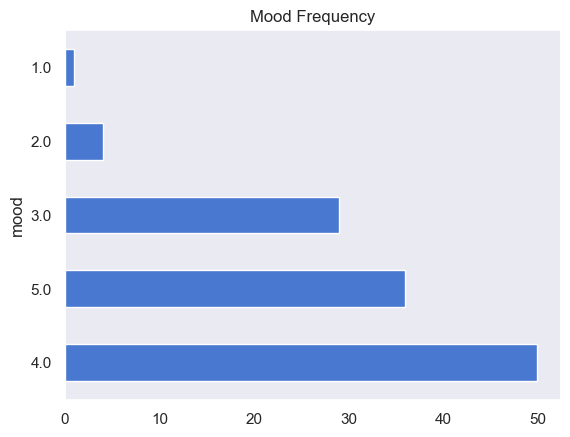

In [79]:
ax = df.mood.value_counts().plot(kind='barh', title='Mood Frequency')

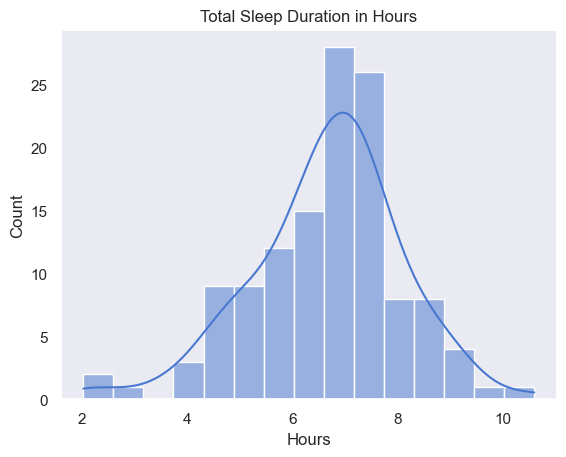

In [298]:
sns.histplot(data=df, x='total_sleep_duration', kde=True, bins='auto')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Total Sleep Duration in Hours')
plt.show()

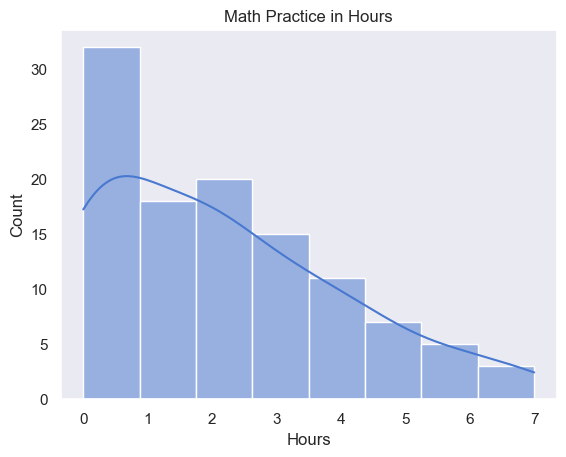

In [299]:
sns.histplot(data=df, x='math_practice', kde=True, bins='auto')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Math Practice in Hours')
plt.show()

<Axes: title={'center': 'Math Practice in Hours'}, ylabel='math_practice'>

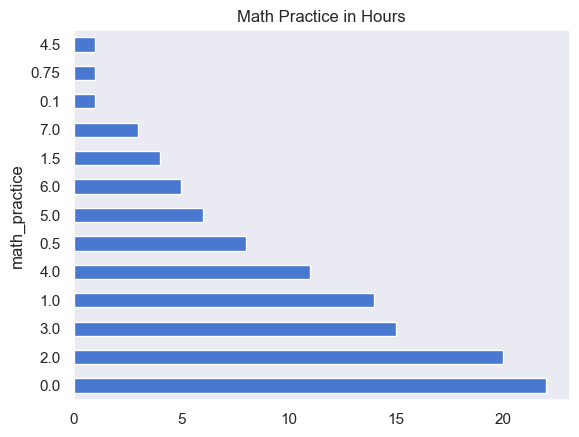

In [81]:
df.math_practice.value_counts().plot(kind='barh', title='Math Practice in Hours')

There were at least 3 weeks where I did zero hours of math practice.

<Axes: title={'center': 'Exercises'}, ylabel='count'>

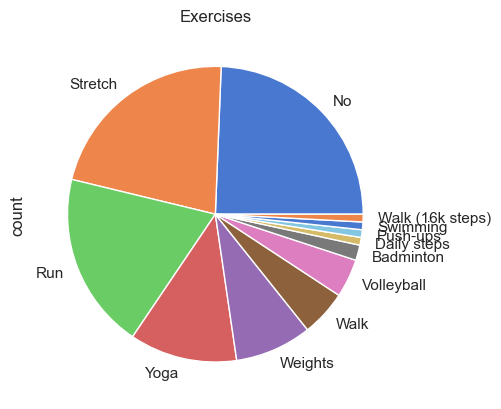

In [82]:
df.exercise.value_counts().plot(kind='pie',title='Exercises')

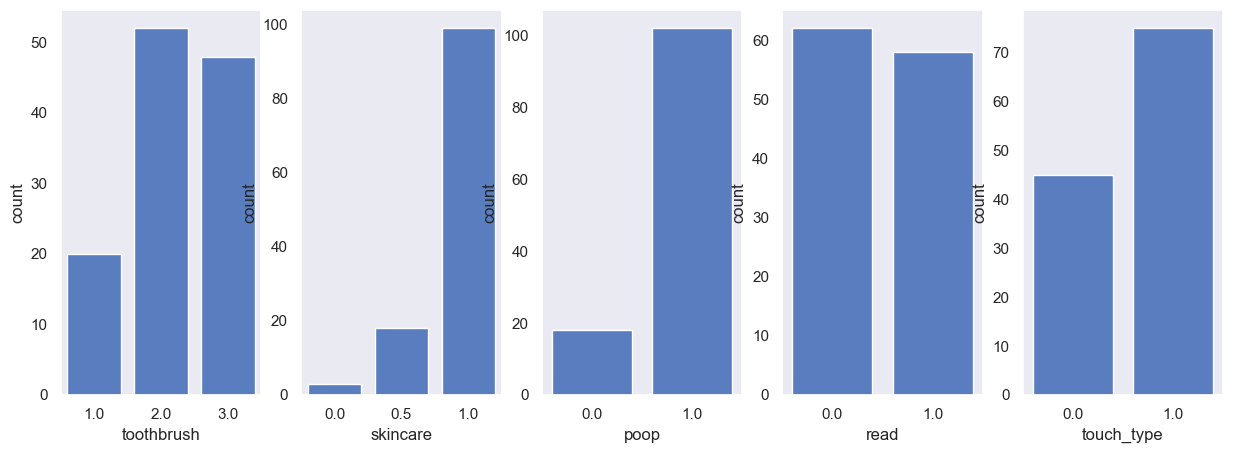

In [83]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

binaries = ['toothbrush', 'skincare', 'poop', 'read', 'touch_type']

for k in range(len(binaries)):
    i = binaries[k]
    sns.countplot(data=df, x=i, ax=axes[k])
plt.show()

In [84]:
print('\nObservations:\n')
print(f'I brushed my teeth on average {int(df.toothbrush.mean())} times a day during the semester.')
print(f'I was able to complete my skincare on approximately {round(len(df[df.skincare == 1.0])/len(df[df.skincare.notnull()]),2)*100}% days during the semester.')
print(f'I was able to observe bowel movement approximately {round(len(df[df.poop == 1.0])/len(df[df.poop.notnull()]),4)*100}% days during the semester.')
print(f'I was able to read at least 30 minutes a day approximately {round(len(df[df.read == 1.0])/len(df[df.read.notnull()]),4)*100}% days during the semester.')
print(f'I was able to practice touch typing approximately {round(len(df[df.touch_type == 1.0])/len(df[df.touch_type.notnull()]),4)*100}% days during the semester.\n')


Observations:

I brushed my teeth on average 2 times a day during the semester.
I was able to complete my skincare on approximately 82.0% days during the semester.
I was able to observe bowel movement approximately 85.0% days during the semester.
I was able to read at least 30 minutes a day approximately 48.33% days during the semester.
I was able to practice touch typing approximately 62.5% days during the semester.



In [85]:
df.describe()[['sleep_duration','sleep_score','mental_recovery','physical_recovery','sleep_efficiency','sleep_cycle']]

sleep_duration  sleep_score  mental_recovery  physical_recovery  \
count      127.000000   127.000000       127.000000         127.000000   
mean         6.370902    76.959016        63.327869          63.631148   
min          0.600000    41.000000         1.000000          12.000000   
25%          5.450000    71.500000        57.000000          59.000000   
50%          6.620000    79.000000        66.000000          64.000000   
75%          7.380000    85.000000        75.000000          71.500000   
max          9.230000    93.000000        91.000000          88.000000   
std          1.579987    10.600537        17.132278          12.204085   

       sleep_efficiency  sleep_cycle  
count        127.000000   127.000000  
mean          89.565574     3.852459  
min           78.000000     0.000000  
25%           88.000000     3.000000  
50%           90.000000     4.000000  
75%           91.000000     5.000000  
max          100.000000     7.000000  
std            3.039391     1.270371

Some observations again:
- My physical recovery and mental recovery scores are roughly the same.
- My sleep efficiency is a bit high!
- I had an average of around 4 sleep cycles during the semester, which is good!

Let's view a KDE plot with these features.

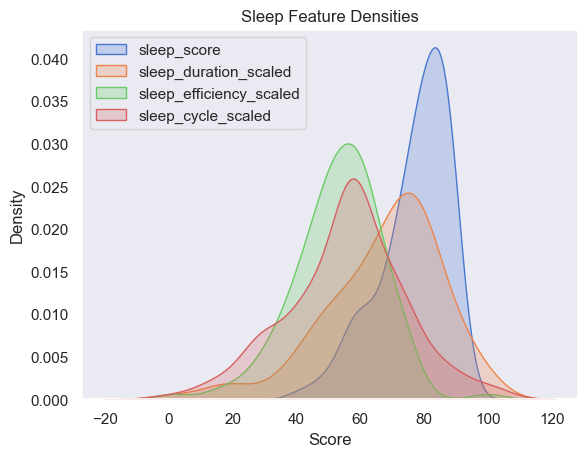

In [86]:
# Scale sleep duration and sleep cycle first from 1 to 100
scaler = MinMaxScaler(feature_range=(1, 100))
df_experiment['sleep_duration_scaled'] = scaler.fit_transform(df_experiment[['sleep_duration']])
df_experiment['sleep_cycle_scaled'] = scaler.fit_transform(df_experiment[['sleep_cycle']])
df_experiment['sleep_efficiency_scaled'] = scaler.fit_transform(df_experiment[['sleep_efficiency']])

# Plot
sleep_features = ['sleep_score',
                  'sleep_duration_scaled', 
                  # 'physical_recovery',
                  # 'mental_recovery',
                  'sleep_efficiency_scaled', 
                  'sleep_cycle_scaled']

for i in sleep_features:
    sns.kdeplot(df_experiment[i], fill=True, label=i)
                
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Sleep Feature Densities')
plt.legend()
plt.show()

Of course, it'll be much better to compare these values with respect to time. We'll do this later.

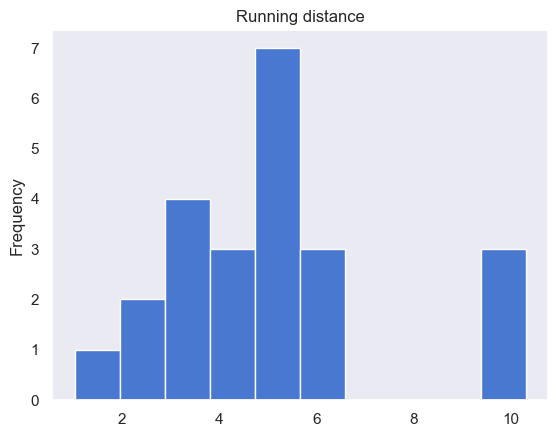

In [87]:
ax = df.workout_distance.plot(kind='hist', title='Running distance')

The bumps on the 5KM and 10KM are very apparent.

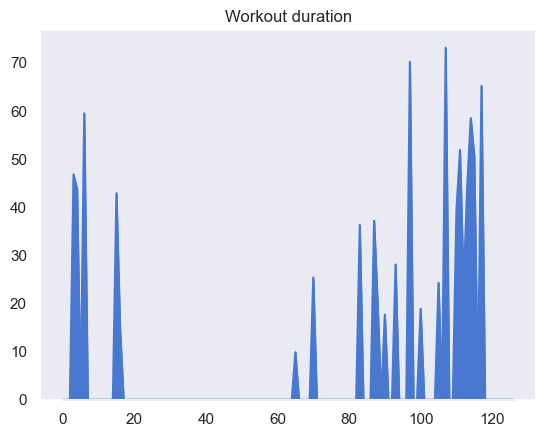

In [88]:
ax = df.workout_duration.plot(kind='area', title='Workout duration')

<Axes: xlabel='step_count'>

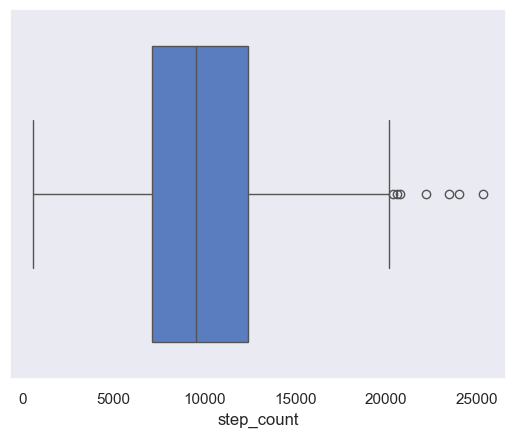

In [89]:
sns.boxplot(data=df, x='step_count')

According to the data, my workouts are either less than 20 minutes or longer than an hour. Interesting.

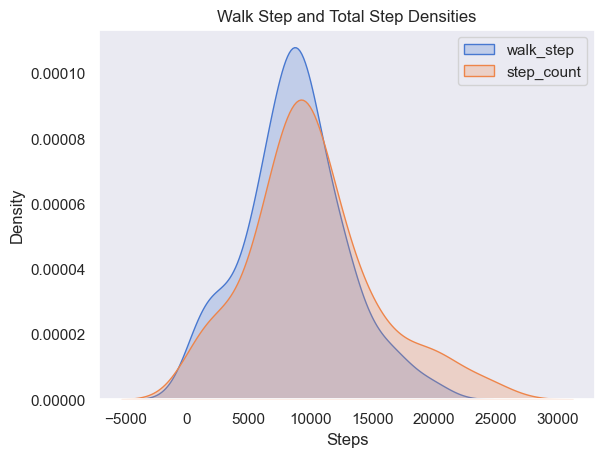

In [90]:
# Plot
step_features = ['walk_step', 'step_count']

for i in step_features:
    sns.kdeplot(df_experiment[i], fill=True, label=i)
                
plt.xlabel('Steps')
plt.ylabel('Density')
plt.title('Walk Step and Total Step Densities')
plt.legend()
plt.show()

Now let's create a word cloud for some of the columns in `habits`.

In [91]:
text = ' '.join(str(t) for t in df[df.win.notnull()].win)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

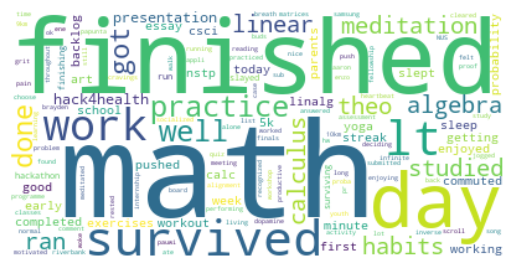

In [92]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [93]:
text = ' '.join(str(t) for t in df[df.grateful_for.notnull()].grateful_for)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

In [314]:
# plt.imshow(word_cloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

Not showing because it's a bit personal! 😆

## 🔗 Feature Relationships

Now we get to the more exciting part! Let's look at how features relate to other features!

### Numerical habit columns over time

In [95]:
df.select_dtypes(include='number').columns

Index(['toothbrush', 'skincare', 'mood', 'read', 'touch_type',
       'minutes_meditated', 'poop', 'math_practice', 'run_step', 'walk_step',
       'step_count', 'step_distance', 'step_calorie', 'mental_recovery',
       'physical_recovery', 'sleep_efficiency', 'sleep_score',
       'sleep_duration', 'sleep_cycle', 'total_sleep_duration',
       'workout_distance', 'workout_duration'],
      dtype='object')

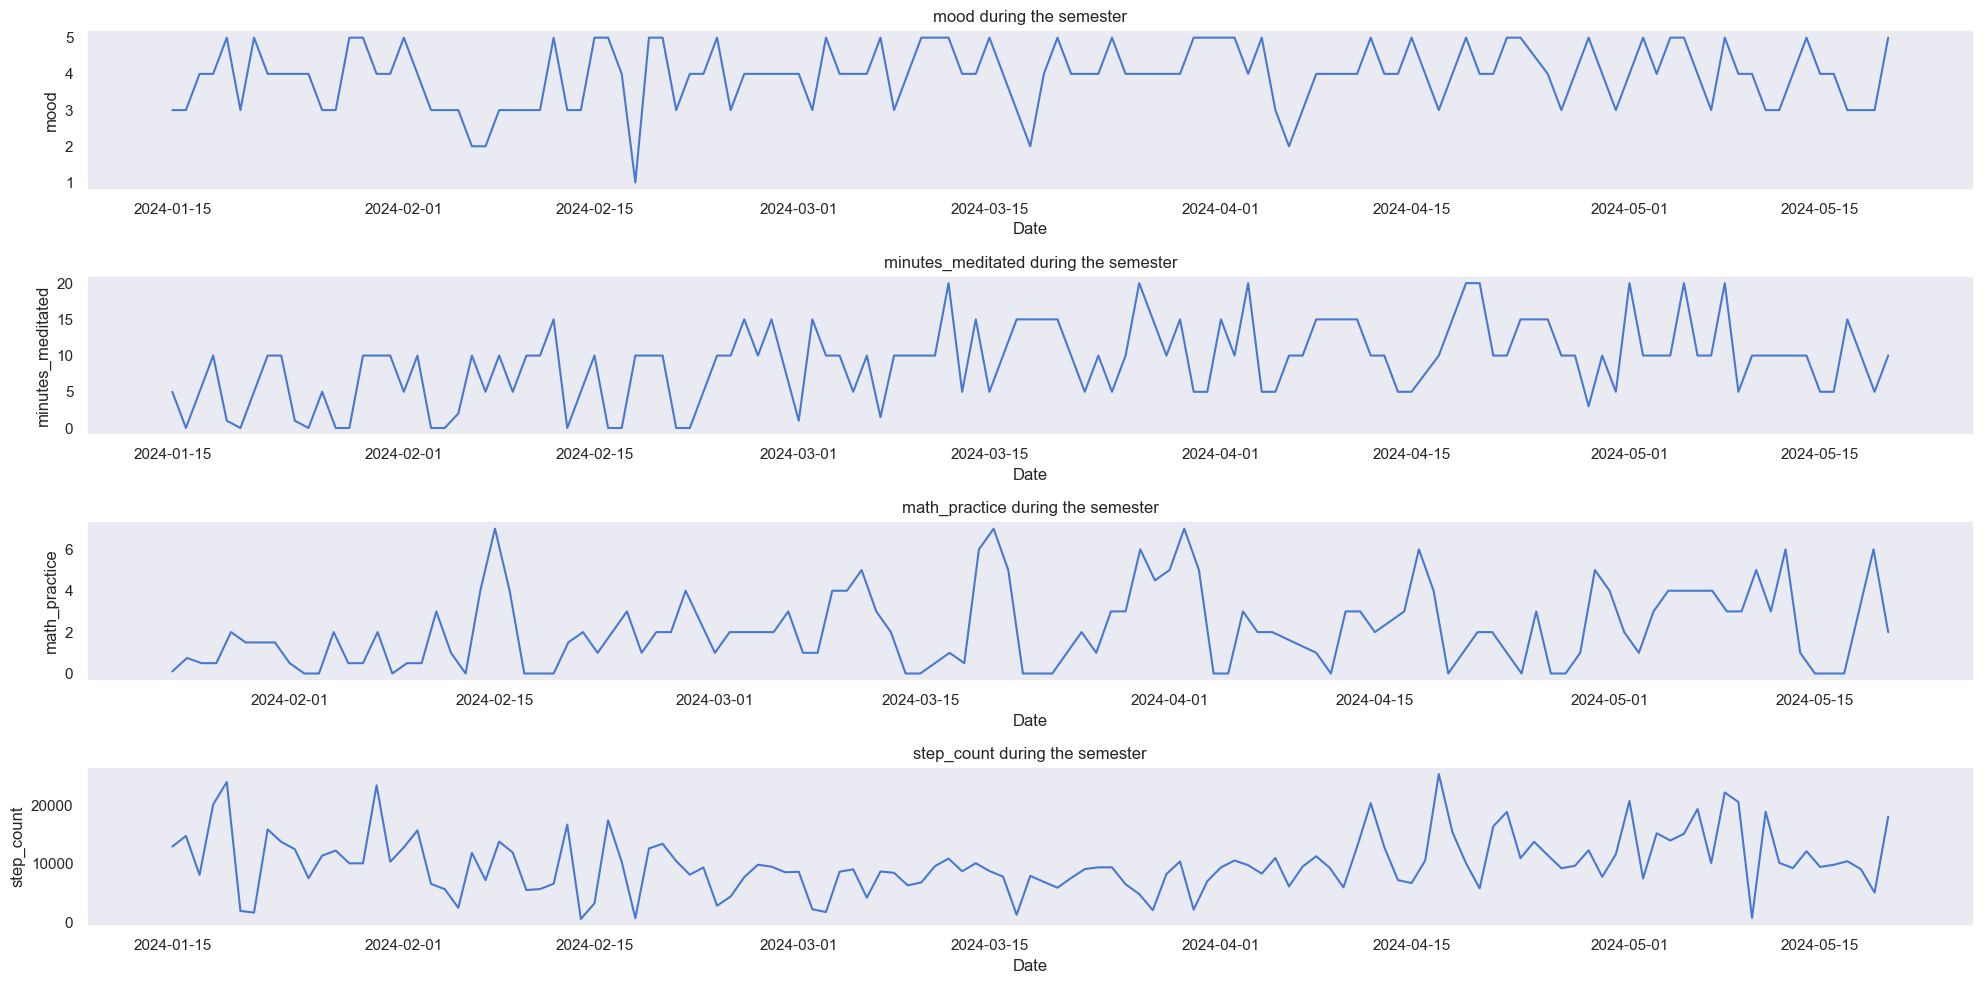

In [96]:
num_cols = ['mood', 'minutes_meditated', 'math_practice', 'step_count']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 10))

axes = axes.flatten()

for i in range(len(num_cols)):
    col = num_cols[i]
    sns.lineplot(data=df, x='date', y=col, ax=axes[i])
    axes[i].set_title(f'{col} during the semester')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

- My mood was at least 3 for most of the time.
- Minutes meditated was heavily fluctuating until mid-March. After that, I became consistent and there are longer plateaus.
- Math practice looks interesting because there are spikes. I suspect these are when long tests are near.
- My step count often had peaks before March, which was when I was more active in running. I ended up with a running injury so I rested from March to mid-April. The big spike near April 15 makes sense as this was a running event I attended. After that, values continued to spike as I returned back to running.

In [97]:
df.columns

Index(['date', 'toothbrush', 'skincare', 'mood', 'read', 'touch_type',
       'exercise', 'minutes_meditated', 'grateful_for', 'poop',
       'math_practice', 'win', 'infinite_scrolled', 'event', 'event_type',
       'event_date_end', 'run_step', 'walk_step', 'step_count',
       'step_distance', 'step_calorie', 'sleep_start', 'sleep_end',
       'mental_recovery', 'physical_recovery', 'sleep_efficiency',
       'sleep_score', 'sleep_duration', 'sleep_cycle', 'total_sleep_duration',
       'workout_start_date', 'workout', 'workout_distance',
       'workout_duration'],
      dtype='object')

In [98]:
# Calculate the Pearson correlation coefficient
def r2(col1, col2):
    df_mm = df[df[col1].notnull() & df[col2].notnull()]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_mm[[col1, col2]])
    return np.corrcoef(scaled_data.T)[0, 1]

def annotate(ax, label, val):
    ax.annotate(f'{label}: {val:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

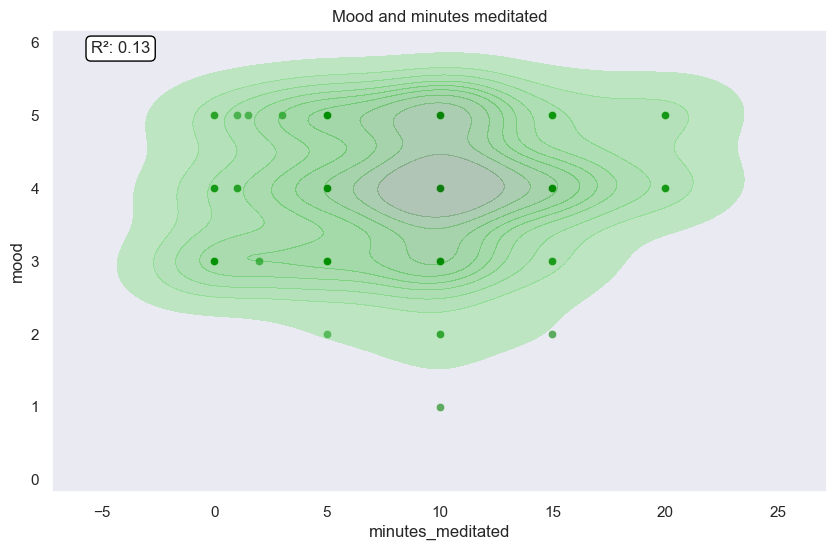

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df, x='minutes_meditated', y='mood', color='green', alpha=0.6)
sns.kdeplot(data=df, x='minutes_meditated', y='mood', color='green', fill=True, alpha=0.3)
annotate(ax, 'R²', r2('mood', 'minutes_meditated'))

plt.title('Mood and minutes meditated')
plt.show()

The linear correlation coefficient is positively low. However it's notable that when I meditate for more than 15 minutes, my mood is at least 4.

### Numerical sleep columns over time

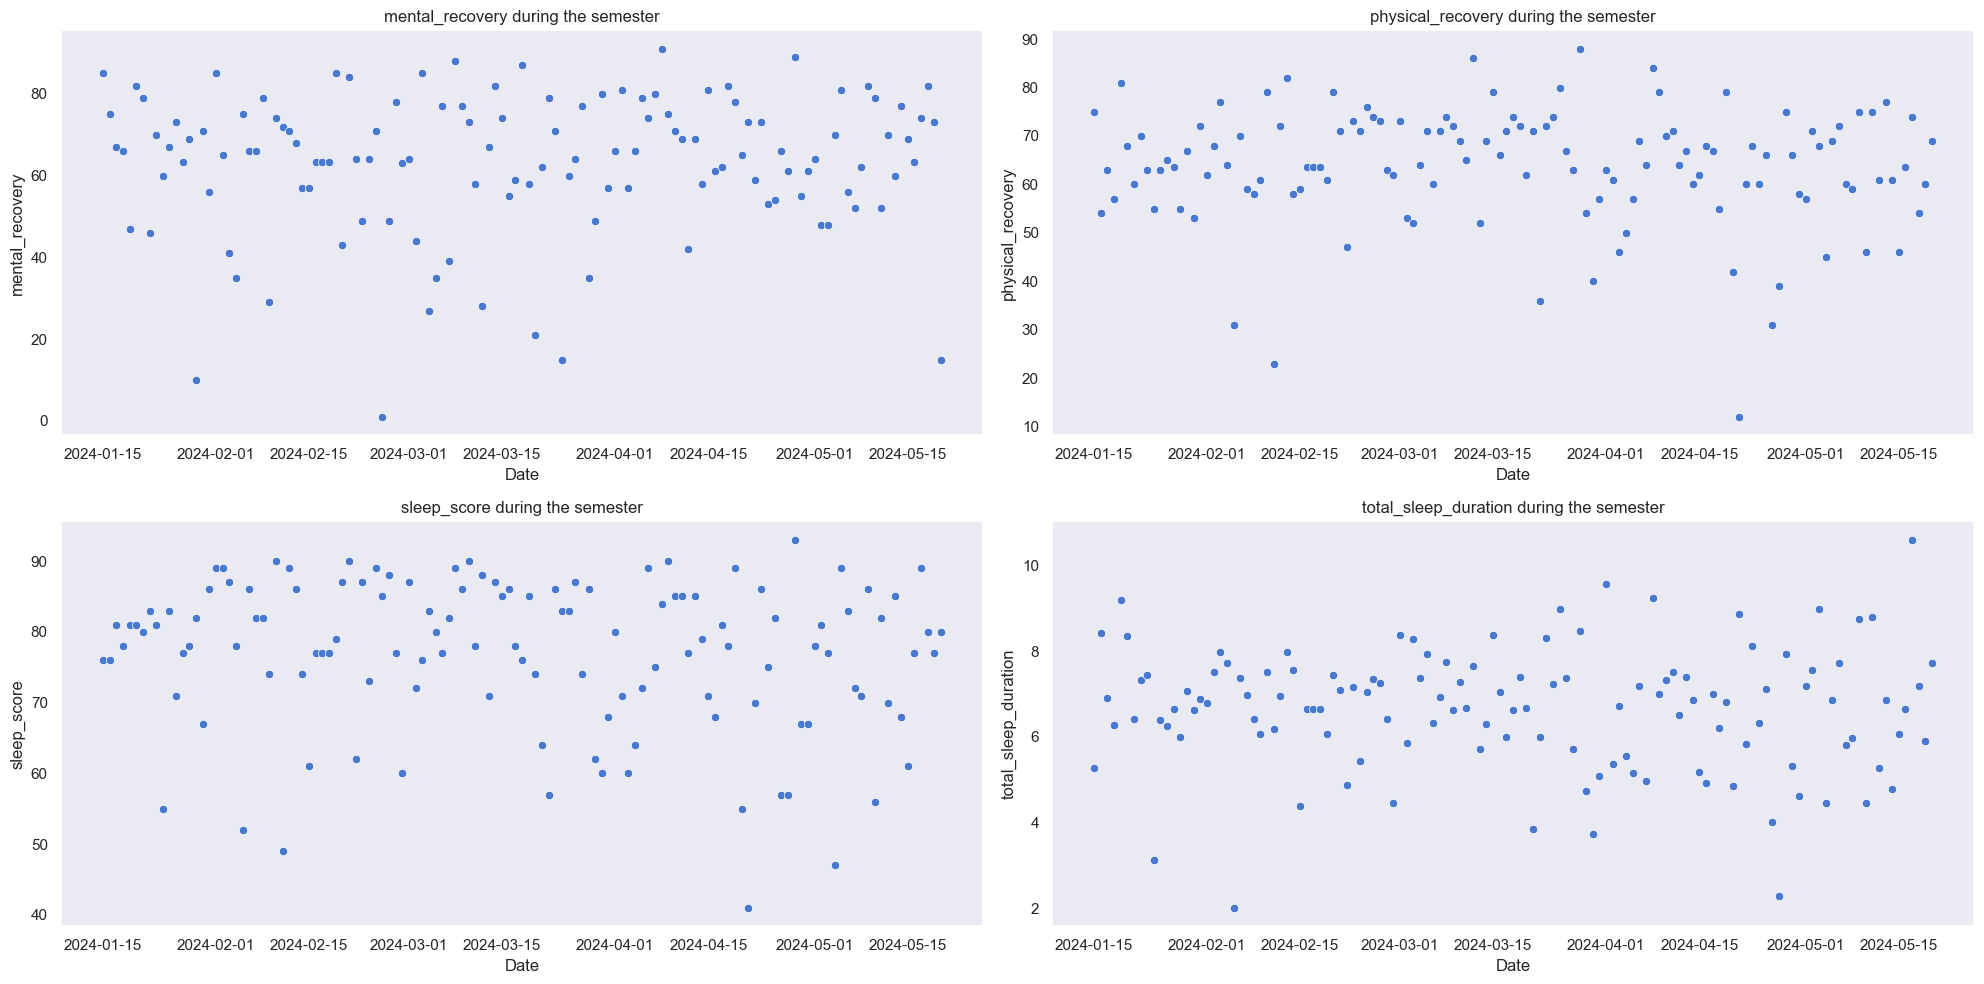

In [100]:
num_cols = ['mental_recovery','physical_recovery', 'sleep_score', 'total_sleep_duration']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

axes = axes.flatten()

for i in range(len(num_cols)):
    col = num_cols[i]
    sns.scatterplot(data=df, x='date', y=col, ax=axes[i])
    axes[i].set_title(f'{col} during the semester')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

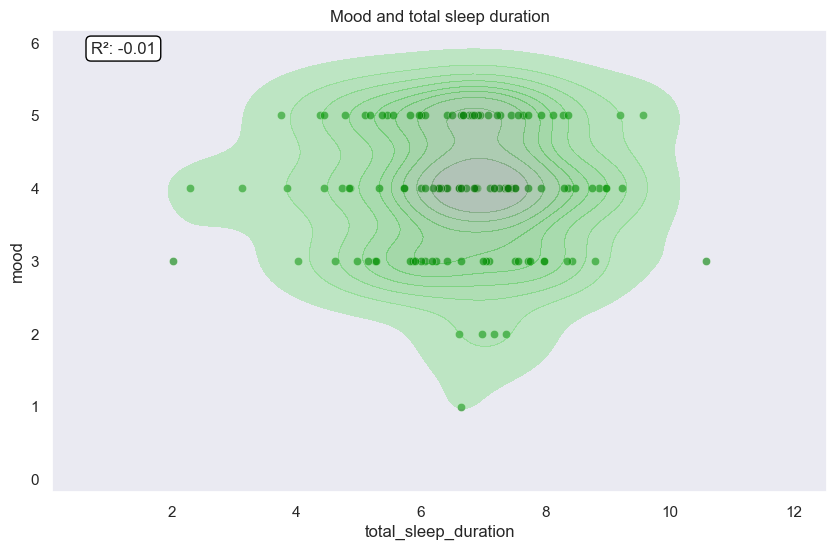

In [101]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df, x='total_sleep_duration', y='mood', color='green', alpha=0.6)
sns.kdeplot(data=df, x='total_sleep_duration', y='mood', color='green', fill=True, alpha=0.3)
annotate(ax, 'R²', r2('mood', 'total_sleep_duration'))

plt.title('Mood and total sleep duration')
plt.show()

No linear correlation between mood and total sleep duration.

In [102]:
df.columns

Index(['date', 'toothbrush', 'skincare', 'mood', 'read', 'touch_type',
       'exercise', 'minutes_meditated', 'grateful_for', 'poop',
       'math_practice', 'win', 'infinite_scrolled', 'event', 'event_type',
       'event_date_end', 'run_step', 'walk_step', 'step_count',
       'step_distance', 'step_calorie', 'sleep_start', 'sleep_end',
       'mental_recovery', 'physical_recovery', 'sleep_efficiency',
       'sleep_score', 'sleep_duration', 'sleep_cycle', 'total_sleep_duration',
       'workout_start_date', 'workout', 'workout_distance',
       'workout_duration'],
      dtype='object')

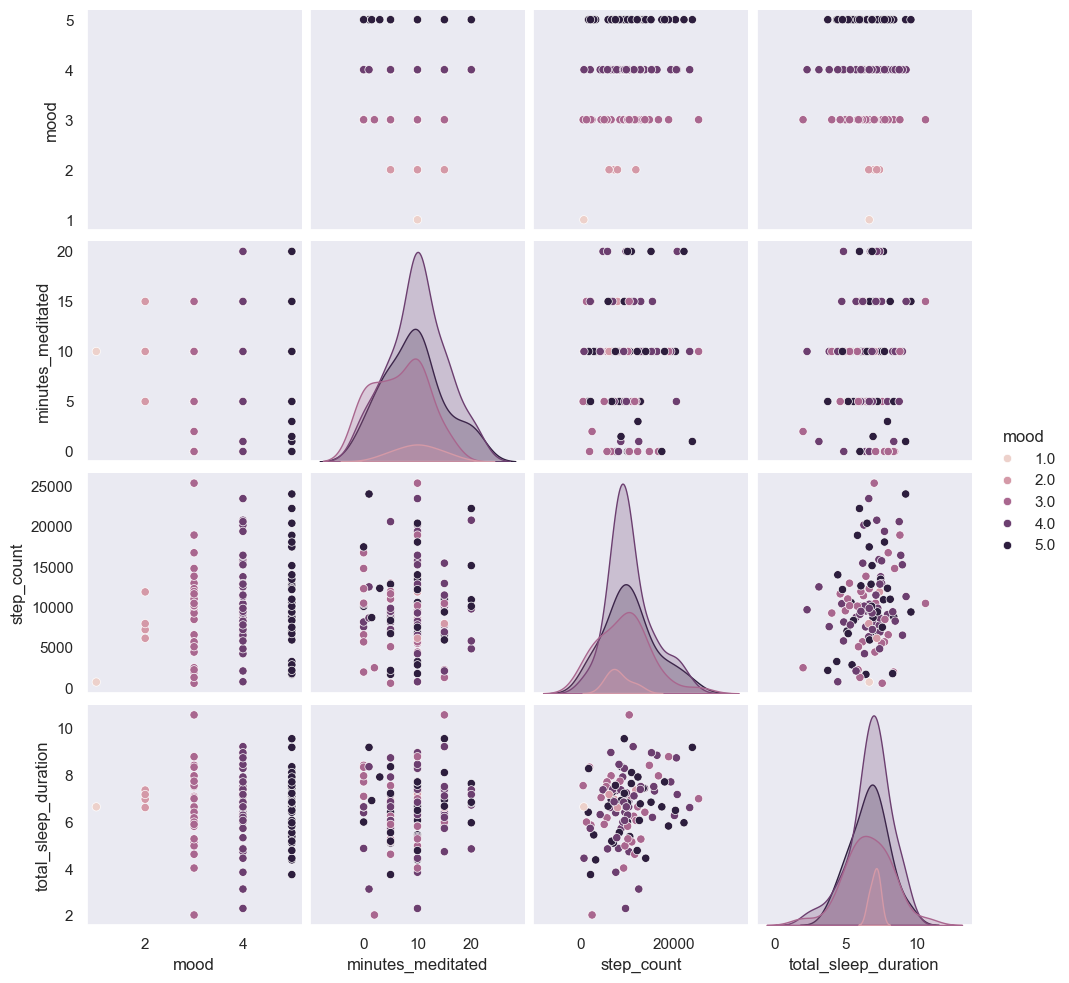

In [103]:
sns.pairplot(data=df, vars=['mood','minutes_meditated','step_count','total_sleep_duration'], hue='mood')
plt.show()

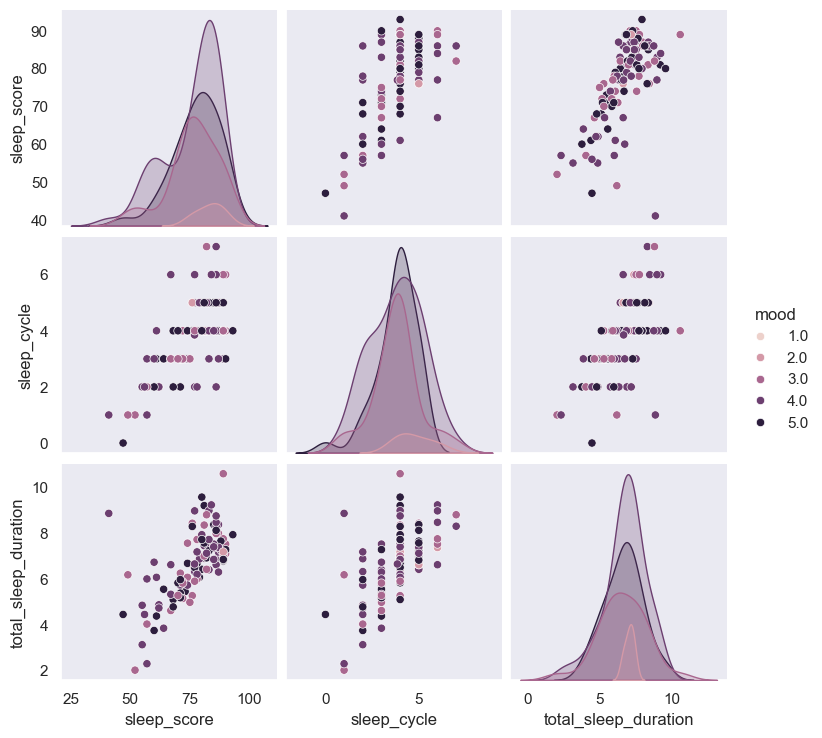

In [104]:
sns.pairplot(data=df, vars=['sleep_score','sleep_cycle','total_sleep_duration'],hue='mood')
plt.show()

In [105]:
df.columns

Index(['date', 'toothbrush', 'skincare', 'mood', 'read', 'touch_type',
       'exercise', 'minutes_meditated', 'grateful_for', 'poop',
       'math_practice', 'win', 'infinite_scrolled', 'event', 'event_type',
       'event_date_end', 'run_step', 'walk_step', 'step_count',
       'step_distance', 'step_calorie', 'sleep_start', 'sleep_end',
       'mental_recovery', 'physical_recovery', 'sleep_efficiency',
       'sleep_score', 'sleep_duration', 'sleep_cycle', 'total_sleep_duration',
       'workout_start_date', 'workout', 'workout_distance',
       'workout_duration'],
      dtype='object')

In [106]:
df_corr = df[['mood', 'minutes_meditated', 'math_practice', 'step_count', 'total_sleep_duration', 'sleep_score']].dropna().corr()

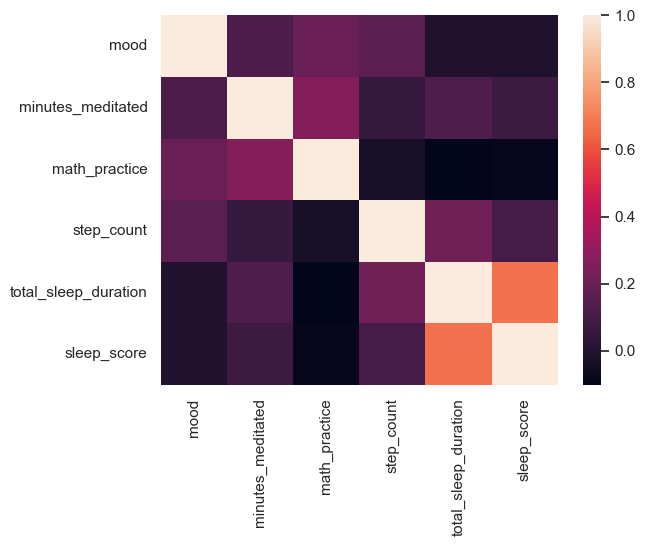

In [107]:
sns.heatmap(df_corr)
plt.show()

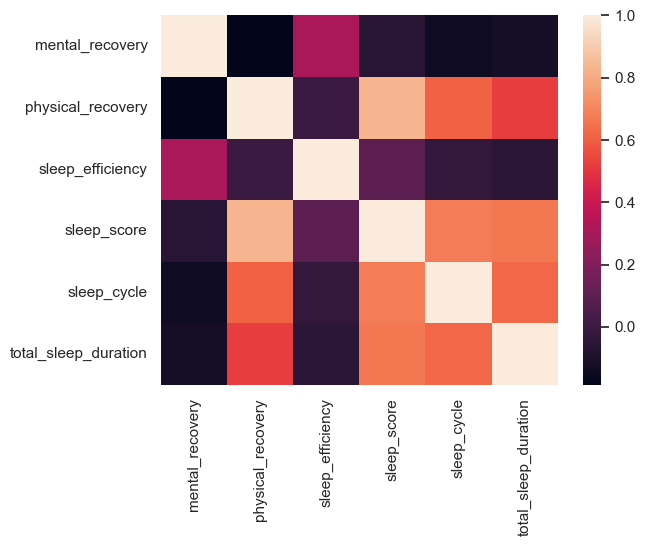

In [108]:
df_corr2 = df[['mental_recovery', 'physical_recovery', 'sleep_efficiency',
       'sleep_score', 'sleep_cycle', 'total_sleep_duration']].dropna().corr()

sns.heatmap(df_corr2)
plt.show()

## 🤠 Questions about the Data

Let's try to confirm my assumptions earlier:
1. Were the spikes in math practice due to upcoming long tests?
2. Did my step count lessen in the middle of the semester because of my injury?

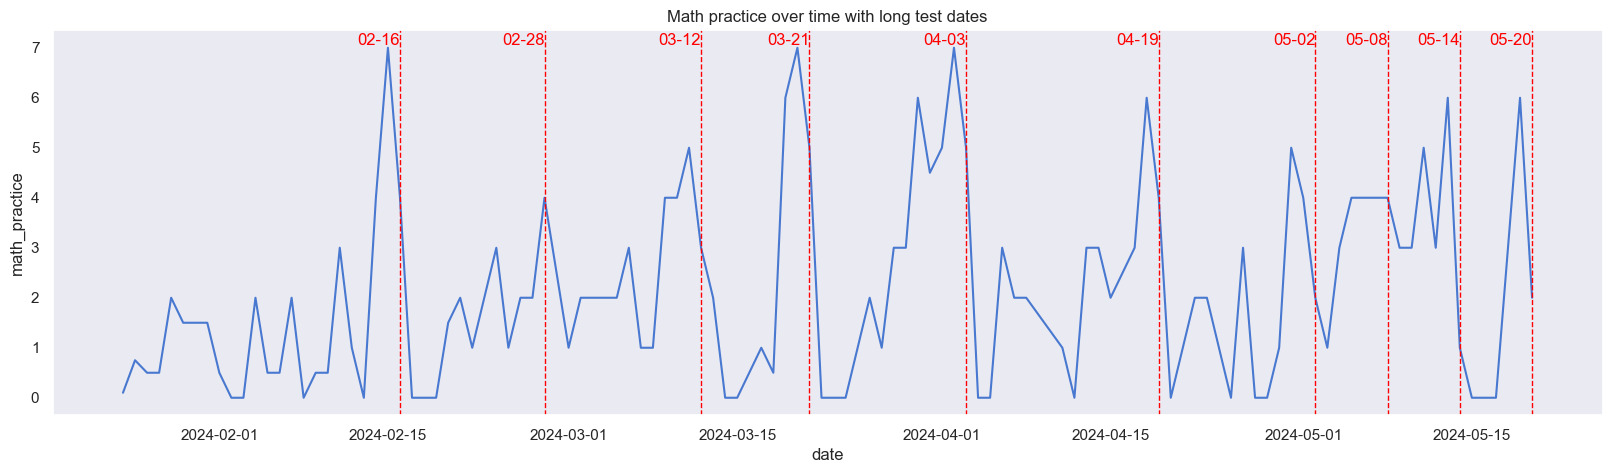

In [109]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(data=df, x='date', y='math_practice')

major_events = df[df.event_type == 'long test'].date.tolist()
for event in major_events:
    ax.axvline(event, color='red', linestyle='--', lw=1)
    ax.text(event, df['math_practice'].max(), event.strftime('%m-%d'), va='bottom', ha='right', color='red')
    
plt.title('Math practice over time with long test dates')
plt.show()

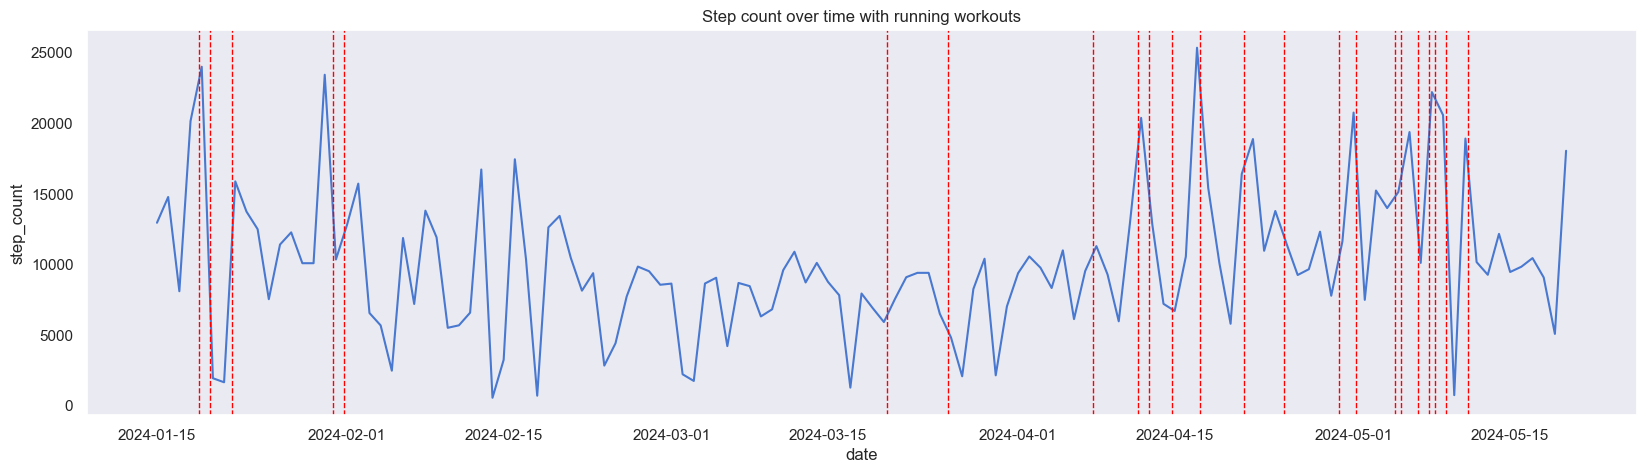

In [110]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(data=df, x='date', y='step_count')

major_events = df[df.workout == 'Run'].workout_start_date.tolist()
for event in major_events:
    ax.axvline(event, color='red', linestyle='--', lw=1)
    # ax.text(event, df['step_count'].max(), event.strftime('%m-%d'), va='bottom', ha='right', color='red')

plt.title('Step count over time with running workouts')
plt.show()

My assumptions were correct!

What was my day like during days of long tests?

In [111]:
df_lt = df[df.event_type == 'long test'].copy()
df_lt['course'] = df_lt['event'].str.slice(0,10)

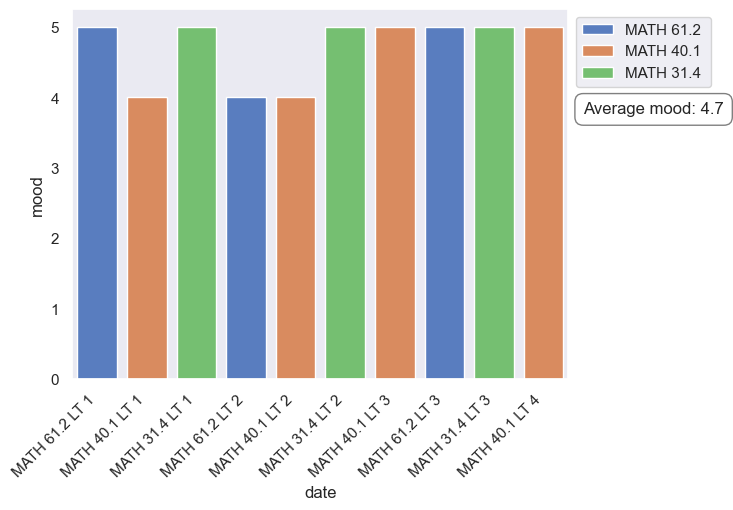

In [112]:
ax = sns.barplot(data=df_lt, x='date', y='mood', hue='course')
ax.set_xticks(range(len(df_lt.event)))
ax.set_xticklabels(df_lt.event.tolist(), rotation=45, ha='right')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.text(1.03, 0.75, f"Average mood: {df_lt.mood.mean()}", transform=plt.gca().transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.5', edgecolor='gray', facecolor='none'))
plt.show()

In [113]:
df_lt.course

32     MATH 61.2 
44     MATH 40.1 
57     MATH 31.4 
66     MATH 61.2 
79     MATH 40.1 
95     MATH 31.4 
108    MATH 40.1 
114    MATH 61.2 
120    MATH 31.4 
126    MATH 40.1 
Name: course, dtype: object

How did I sleep the night before a long test?

In [114]:
date_before_lt = df_lt.date - pd.Timedelta(days=1)
df_before_lt = df[df.date.isin(date_before_lt)].copy().reset_index(drop=True)
df_before_lt = df_before_lt.join(df_lt['course'].reset_index(drop=True))

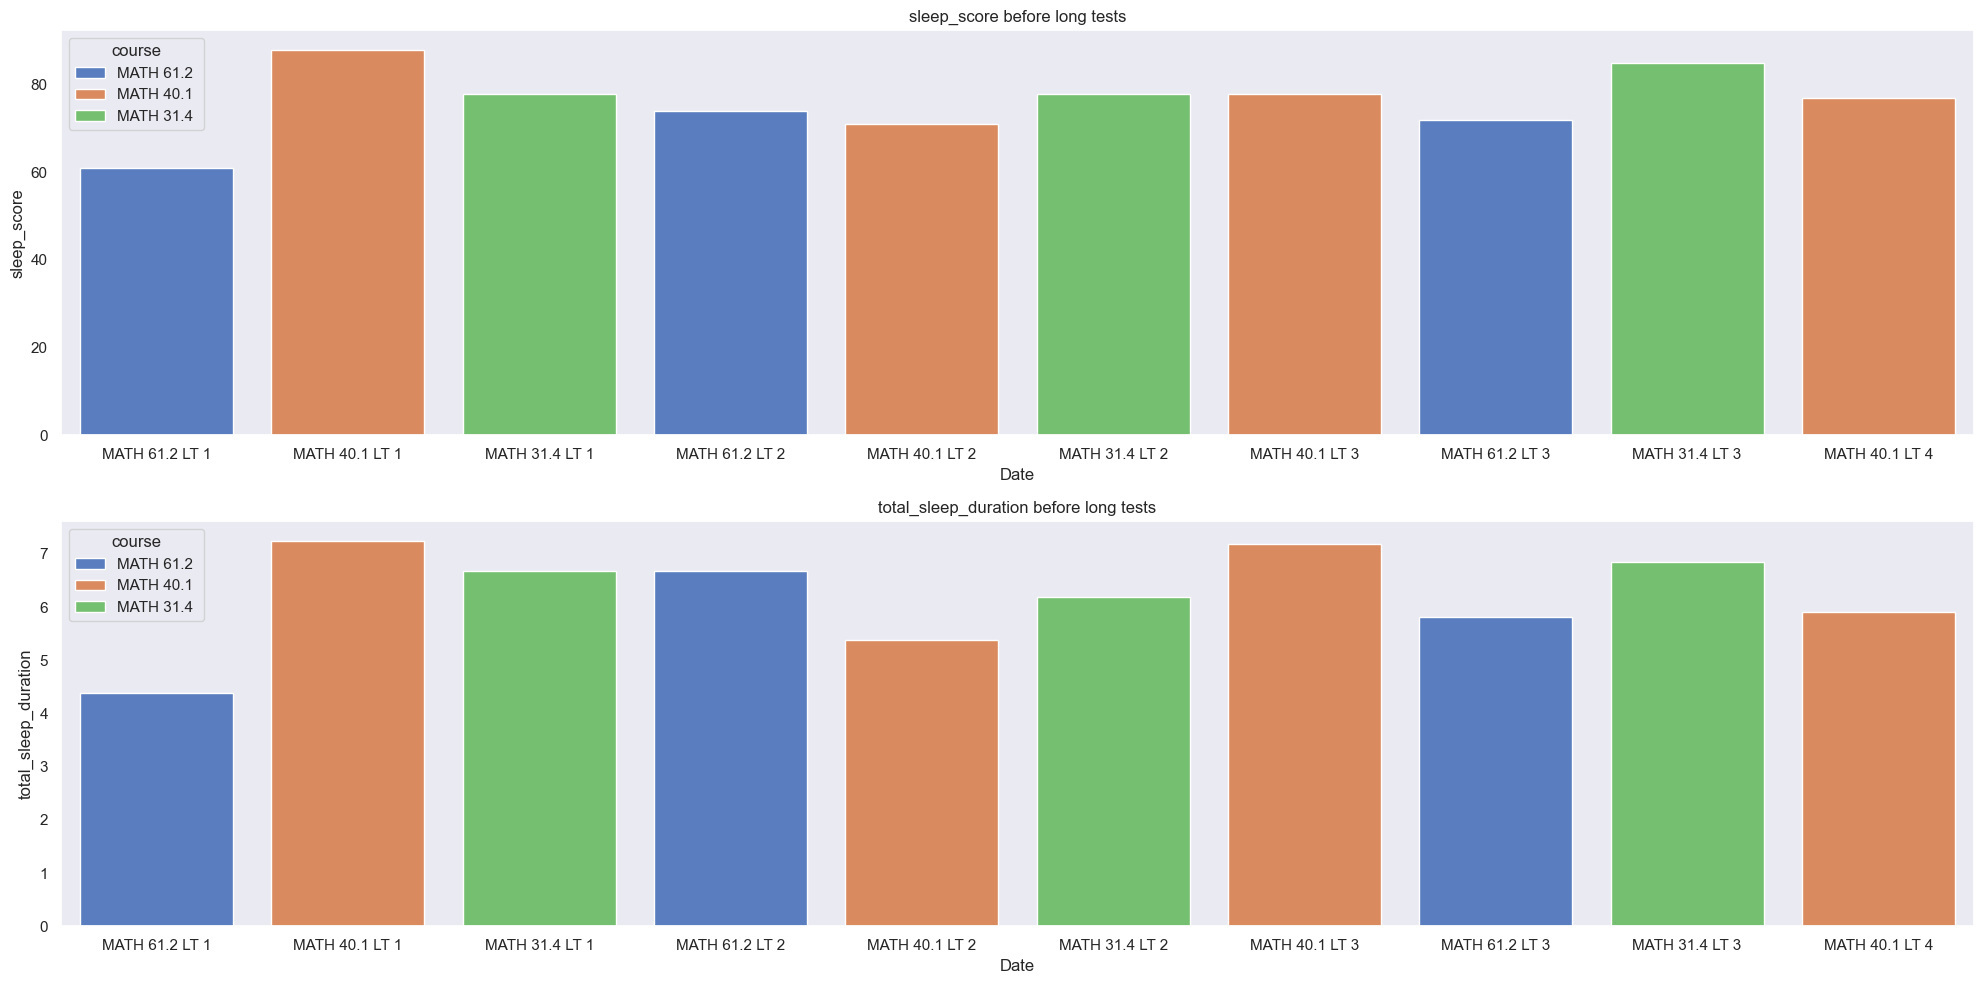

In [115]:
num_cols = ['sleep_score', 'total_sleep_duration']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

axes = axes.flatten()

for i in range(len(num_cols)):
    col = num_cols[i]
    sns.barplot(data=df_before_lt, x='date', y=col, ax=axes[i], hue='course')
    axes[i].set_title(f'{col} before long tests')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)
    axes[i].set_xticks(range(len(df_lt.event)))
    axes[i].set_xticklabels(df_lt.event.tolist(), rotation=0, ha='center')

# Adjust layout
plt.tight_layout()
plt.show()

In [116]:
print(f'Average sleep score before long tests: {df_before_lt.sleep_score.mean()}')
print(f'Average sleep duration before long tests: {df_before_lt.total_sleep_duration.mean()}')

Average sleep score before long tests: 76.2
Average sleep duration before long tests: 6.231999999999999


### What was my day like when I...
1. Slept for more than 7 hours?
2. Had a mood of at least 4?
3. Meditated for more than 10 minutes?
4. Did a workout?

In [283]:
# Some functions to help us
def compare(new_df, feature, feature_name, chart_title, description,use_val=True):
    if use_val:
        new_df[feature].value_counts().plot(kind='barh', title=chart_title)
    else:
        new_df[feature].plot(kind='hist', title=chart_title)
    plt.text(1.03, 0.95, f"*Average {feature_name}: {round(new_df[feature].mean(),2)}", transform=plt.gca().transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.5', edgecolor='gray', facecolor='none'))
    plt.text(1.03, 0.85, f"Overall Average {feature_name}: {round(df[feature].mean(),2)}", transform=plt.gca().transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.5', edgecolor='gray', facecolor='none'))
    plt.text(1.03, 0.75, f"{description}", transform=plt.gca().transAxes, verticalalignment='top')
    plt.show()

def binary_compare(new_df, feature_name, cols=['toothbrush', 'skincare', 'read', 'touch_type', 'exercise']):
    new_df_copy = new_df.copy()
    new_df_copy['exercise'] = new_df_copy['exercise'].isna()

    new_habit_completion = [round(len(new_df_copy[new_df_copy[col] == 1]) / len(new_df_copy[new_df_copy[col].notnull()]),2) for col in cols]
    overall_habit_completion = [round(len(df[df[col] == 1]) / len(df[df[col].notnull()]),2) for col in cols]

    chart = pd.DataFrame(data={
        'habit': cols,
         feature_name: new_habit_completion,
        'Overall': overall_habit_completion
    })
    chart_melted = pd.melt(chart, 'habit')
    sns.catplot(data=chart_melted, x='habit', y='value', hue='variable', kind='bar')
    plt.title('Habit Comparison')
    plt.show()

#### Slept for more than 7 hours

In [281]:
df_sleep = df[df.total_sleep_duration > 7]
len(df_sleep)

53

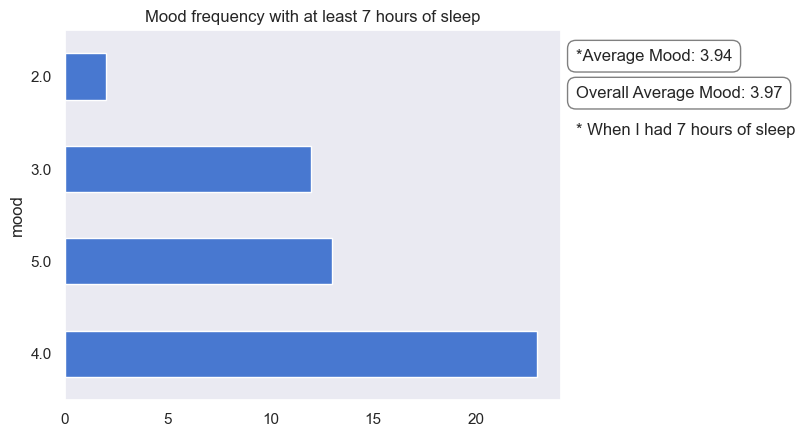

In [289]:
compare(df_sleep, 'mood', 'Mood', 'Mood frequency with at least 7 hours of sleep', '* When I had 7 hours of sleep')

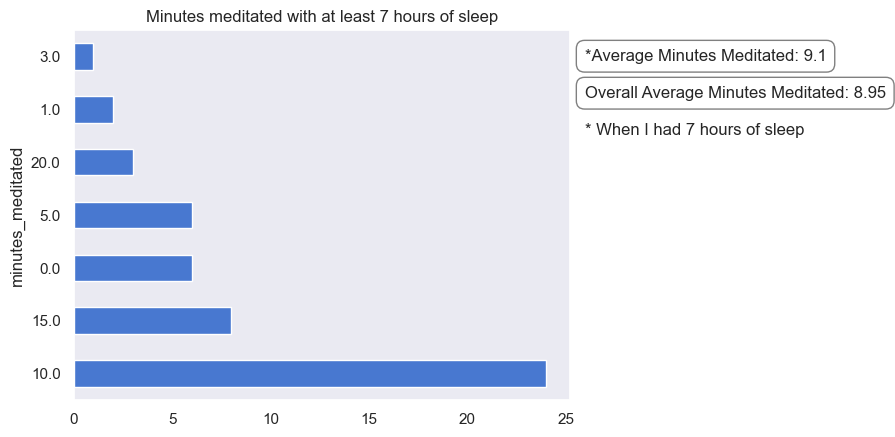

In [290]:
compare(df_sleep, 'minutes_meditated', 'Minutes Meditated', 'Minutes meditated with at least 7 hours of sleep', '* When I had 7 hours of sleep')

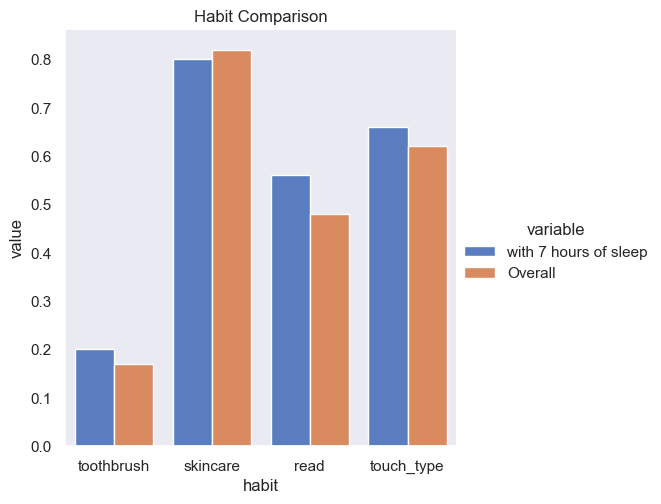

In [292]:
binary_compare(df_sleep, 'with 7 hours of sleep')

#### Had a mood was at least 4

In [308]:
df_mood = df[df.mood >= 4]
len(df_mood)

86

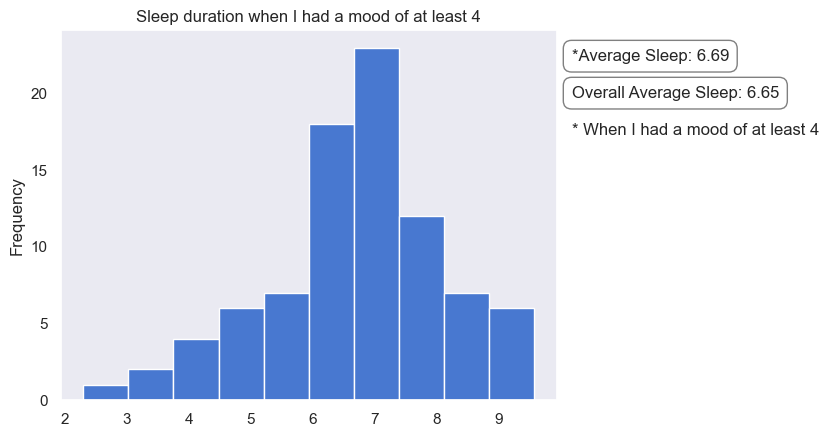

In [294]:
compare(df_mood, 'total_sleep_duration', 'Sleep', 'Sleep duration when I had a mood of at least 4', '* When I had a mood of at least 4', use_val=False)

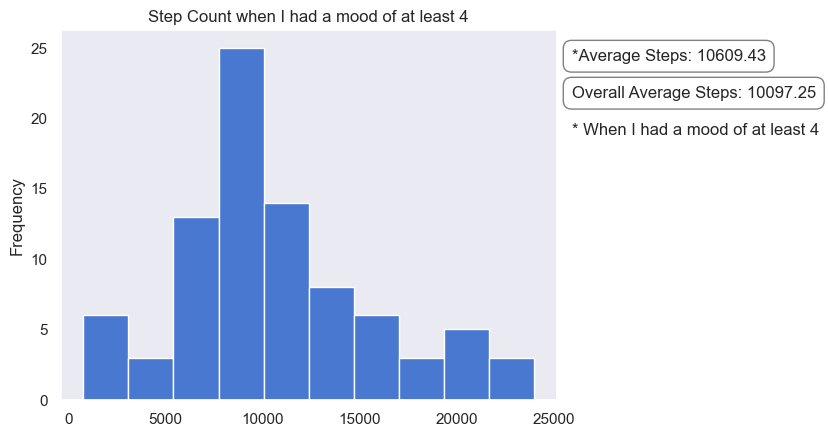

In [301]:
compare(df_mood, 'step_count', 'Steps', 'Step Count when I had a mood of at least 4', '* When I had a mood of at least 4', use_val=False)

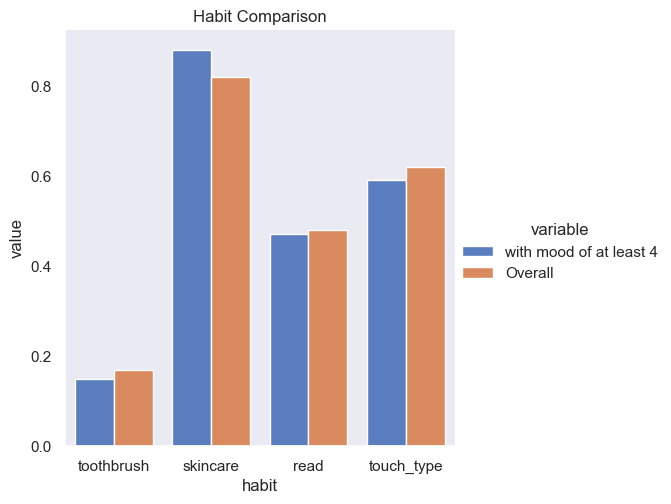

In [315]:
binary_compare(df_mood, 'with mood of at least 4')

#### Meditated for more than 10 minutes

In [307]:
df_med = df[df.minutes_meditated > 10]
len(df_mood)

86

Remark: This is the same number as the number of days I had a mood of at least 4.

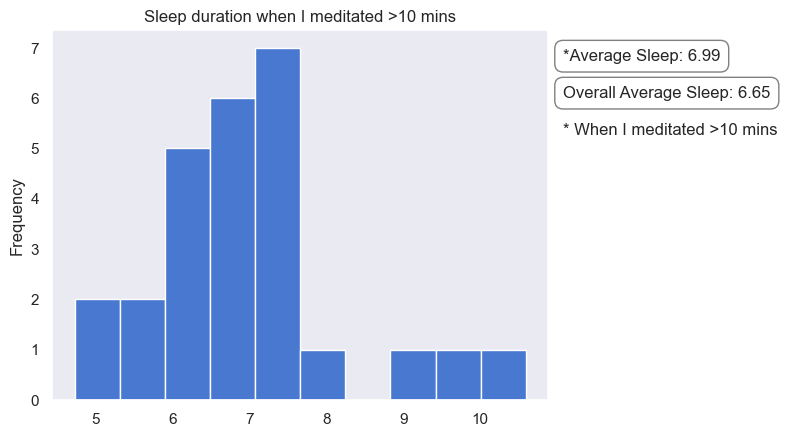

In [310]:
compare(df_med, 'total_sleep_duration', 'Sleep', 'Sleep duration when I meditated >10 mins', '* When I meditated >10 mins', use_val=False)

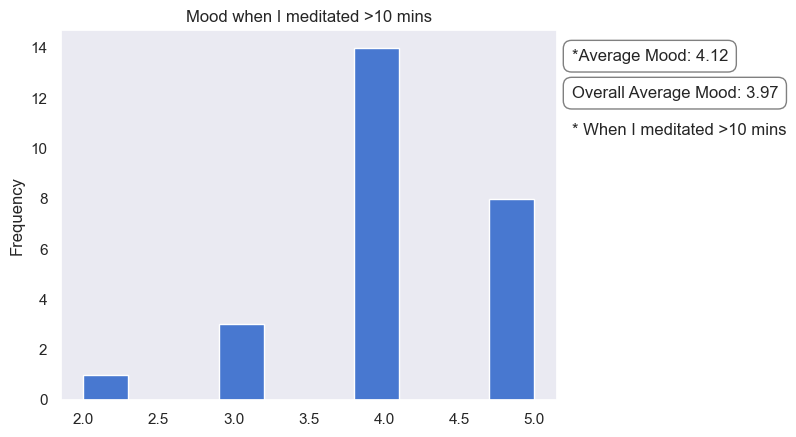

In [312]:
compare(df_med, 'mood', 'Mood', 'Mood when I meditated >10 mins', '* When I meditated >10 mins', use_val=False)

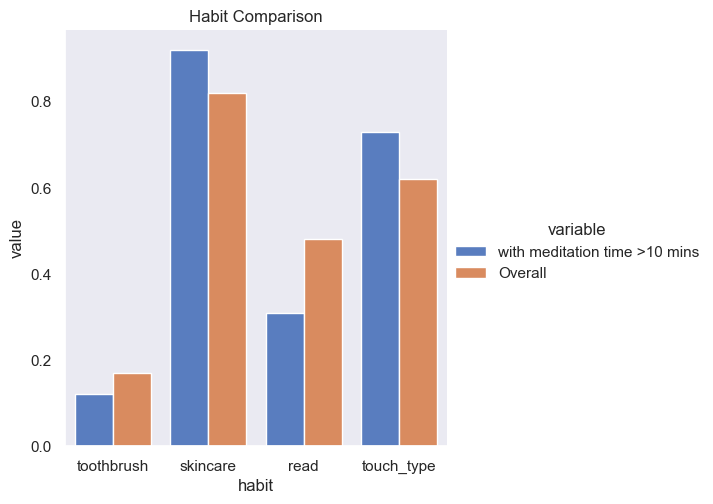

In [316]:
binary_compare(df_med, 'with meditation time >10 mins')

#### Did a workout

In [319]:
df_w = df[df.workout.notnull()].copy()

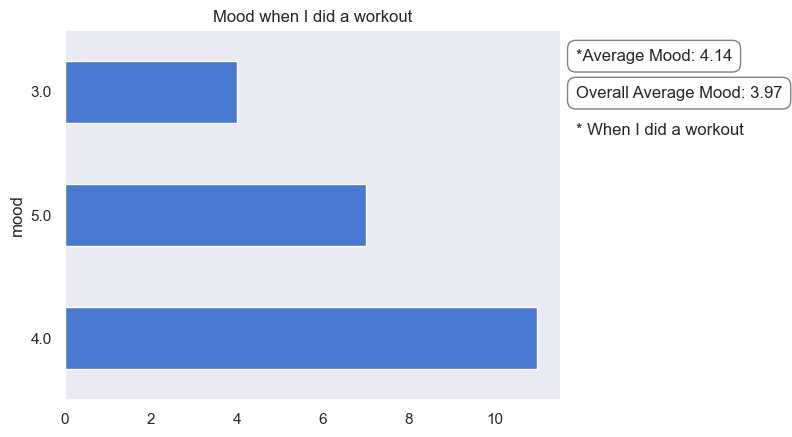

In [321]:
compare(df_w, 'mood', 'Mood', 'Mood when I did a workout', '* When I did a workout')

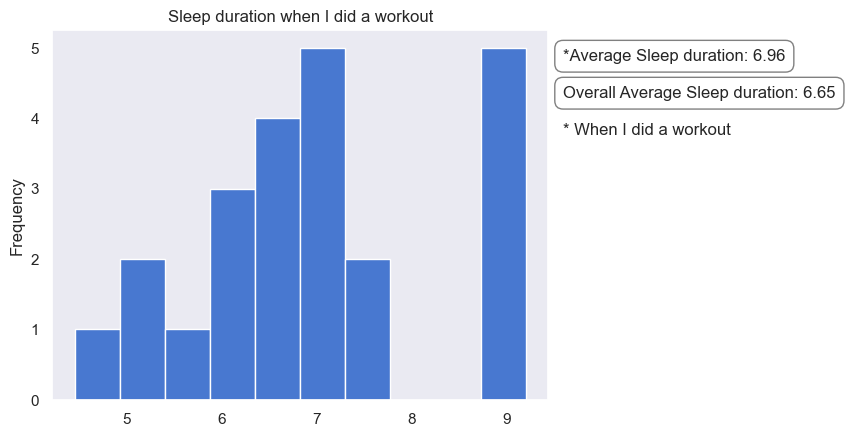

In [323]:
compare(df_w, 'total_sleep_duration', 'Sleep duration', 'Sleep duration when I did a workout', '* When I did a workout', use_val=False)

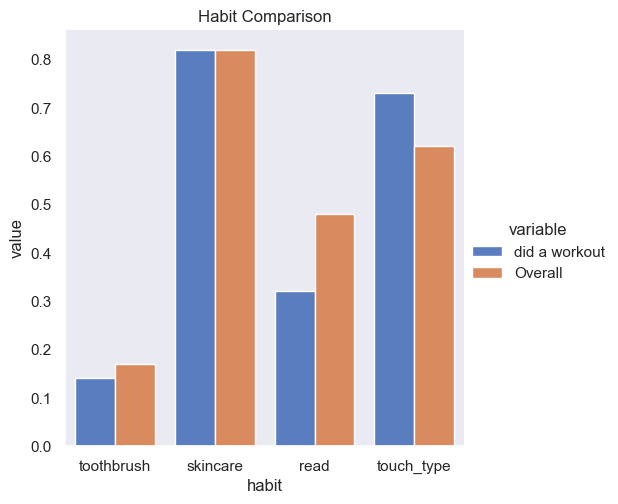

In [324]:
binary_compare(df_w, 'did a workout')

#### So far, how can I use what I've learned for the upcoming semester?

1. 